In [10]:
%pip install pandas numpy librosa scikit-learn seaborn matplotlib tqdm
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import seaborn as sns

# Sklearn Modülleri
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, classification_report, make_scorer
from sklearn.tree import DecisionTreeClassifier

# Uyarıları kapatmak için (Opsiyonel)
import warnings
warnings.filterwarnings('ignore')

print("Kütüphaneler yüklendi.")

# Görselleştirmelerin düzgün görünmesi için
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Kütüphaneler yüklendi.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import os

# Metadata'yı oku
metadata = pd.read_csv('UrbanSound8K.csv')
print(metadata.head())

      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


In [12]:
def extract_features(file_name):
    try:
        # Sesi yükle (sampling rate sabitlenmesi önerilir)
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        
        # 1. Zaman Alanı Öznitelikleri
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=audio).T, axis=0)
        rms = np.mean(librosa.feature.rms(y=audio).T, axis=0)
        
        # 2. Frekans Alanı Öznitelikleri
        mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sample_rate).T, axis=0)
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate).T, axis=0)
        
        # Tüm öznitelikleri birleştir
        features = np.hstack([zcr, rms, mfccs, spectral_centroid, spectral_bandwidth])
        return features
    except Exception as e:
        print(f"Hata oluştu: {file_name}")
        return None

In [13]:
features_list = []
base_path = 'C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/'

# Her satır için öznitelikleri çıkar
for index, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file_path = os.path.join(base_path, 'fold' + str(row['fold']), row['slice_file_name'])
    data = extract_features(file_path)
    
    if data is not None:
        features_list.append([data, row['classID']])

# Listeyi DataFrame'e çevir
features_df = pd.DataFrame(features_list, columns=['feature', 'label'])
print("Öznitelik çıkarma tamamlandı!")

  0%|          | 7/8732 [00:13<3:32:16,  1.46s/it] 

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100032-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100263-2-0-117.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100263-2-0-121.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100263-2-0-126.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100263-2-0-137.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100263-2-0-143.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100263-2-0-161.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100263-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100263-2-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\100648-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\100648-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Mas

  0%|          | 20/8732 [00:14<51:04,  2.84it/s]  

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\100648-1-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\100652-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\100652-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\100652-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\100652-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\100795-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\100795-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\100795-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\100795-3-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/feng

  0%|          | 32/8732 [00:14<22:14,  6.52it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü

  1%|          | 44/8732 [00:14<11:37, 12.46it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-4.wav


  1%|          | 56/8732 [00:14<07:00, 20.65it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\100852-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\101281-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\101281-3-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\101281-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\101382-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\101382-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\101382-2-0-20.wav


  1%|          | 68/8732 [00:15<04:53, 29.56it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\101382-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\101382-2-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\101382-2-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\101382-2-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\101382-2-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\101415-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\101415-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\101415-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-12.wav


  1%|          | 79/8732 [00:15<03:58, 36.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-26.wav


  1%|          | 85/8732 [00:15<03:36, 39.91it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-38.wav


  1%|          | 96/8732 [00:15<03:30, 41.11it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\101729-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\101848-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\101848-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\101848-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\101848-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\101848-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\101848-9-0-9.wav


  1%|          | 107/8732 [00:15<03:04, 46.81it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\102102-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102103-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102103-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102104-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\102105-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\102106-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\102305-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\102547-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\102547-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\102547-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\102842-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

  1%|▏         | 119/8732 [00:16<02:58, 48.18it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\102842-3-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\102842-3-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\102853-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\102853-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\102853-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\102853-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\102853-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\102853-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\102853-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\102853-8-1-0.wav


  1%|▏         | 130/8732 [00:16<02:53, 49.48it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDriv

  2%|▏         | 142/8732 [00:16<02:49, 50.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-29.wav


  2%|▏         | 153/8732 [00:16<03:04, 46.54it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\102857-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102858-5-0-0.wav


  2%|▏         | 165/8732 [00:17<02:54, 48.96it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102858-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fen

  2%|▏         | 175/8732 [00:17<02:56, 48.35it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\102871-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-1-2.wav


  2%|▏         | 185/8732 [00:17<03:16, 43.51it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-3-2.wav


  2%|▏         | 191/8732 [00:17<03:06, 45.78it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-4-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-4-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-4-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103074-7-4-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\103076-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\103076-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\103076-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

  2%|▏         | 204/8732 [00:17<02:49, 50.26it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-2-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-2-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-2-3.wav


  2%|▏         | 216/8732 [00:18<02:45, 51.35it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-2-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-2-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-2-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103199-4-7-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

  3%|▎         | 228/8732 [00:18<02:46, 51.13it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-3.wav


  3%|▎         | 239/8732 [00:18<02:57, 47.81it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\103249-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-10.wav


  3%|▎         | 249/8732 [00:18<02:59, 47.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-2.wav


  3%|▎         | 259/8732 [00:19<03:04, 45.88it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\103258-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103357-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\103357-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\103438-5-0-0.wav


  3%|▎         | 270/8732 [00:19<02:51, 49.24it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\103438-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\103438-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\104327-2-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\104327-2-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\104327-2-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\104327-2-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\104327-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\104327-2-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\104327-2-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\104327-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104421-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/f

  3%|▎         | 280/8732 [00:19<03:00, 46.74it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104421-2-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104421-2-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104421-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104421-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104421-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104421-2-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-27.wav


  3%|▎         | 285/8732 [00:19<03:38, 38.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-48.wav


  3%|▎         | 294/8732 [00:19<03:48, 36.99it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-52.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-0-66.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-1-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\104625-4-1-8.wav


  3%|▎         | 303/8732 [00:20<03:39, 38.48it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\104817-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\104817-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\104817-4-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\104817-4-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\104817-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\104817-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\104817-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\104817-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\104817-4-0-6.wav


  4%|▎         | 312/8732 [00:20<03:23, 41.42it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\104817-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\104817-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\104817-4-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-10-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-10-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-10-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-10-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-10-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-10-9.wav


  4%|▎         | 323/8732 [00:20<03:11, 43.91it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-11-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-12-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-14-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-14-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-14-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-15-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-15-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-15-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-15-9.wav


  4%|▍         | 333/8732 [00:20<03:07, 44.76it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-16-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-16-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-16-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-16-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-16-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-16-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-17-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-17-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-17-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-17-14.wav


  4%|▍         | 343/8732 [00:21<03:07, 44.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-17-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-17-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-17-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-18-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-18-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-18-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-18-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-19-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-19-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-19-6.wav


  4%|▍         | 353/8732 [00:21<03:03, 45.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-19-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-19-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-19-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-7-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-7-4.wav


  4%|▍         | 363/8732 [00:21<03:04, 45.45it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-7-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-7-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-8-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-8-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-8-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-8-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-8-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-8-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-8-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-9-0.wav


  4%|▍         | 373/8732 [00:21<03:10, 43.87it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-9-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\104998-7-9-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-0.wav


  4%|▍         | 384/8732 [00:21<02:57, 47.08it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-7.wav


  5%|▍         | 395/8732 [00:22<02:50, 48.78it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-16.wav


  5%|▍         | 405/8732 [00:22<02:55, 47.42it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-2-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-3-1.wav


  5%|▍         | 417/8732 [00:22<02:41, 51.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-3-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-3-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-3-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-3-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105029-7-4-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105088-3-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fenginee

  5%|▍         | 429/8732 [00:22<02:44, 50.46it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105088-3-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\105088-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-1-2.wav


  5%|▌         | 441/8732 [00:23<02:46, 49.76it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\105289-8-2-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\105319-3-0-22.wav


  5%|▌         | 454/8732 [00:23<02:34, 53.43it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\105319-3-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\105319-3-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\105415-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\105415-2-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\105415-2-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\105415-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\105415-2-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\105415-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\105415-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\105415-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\105425-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fen

  5%|▌         | 468/8732 [00:23<02:19, 59.04it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\105425-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\105425-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\105425-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\106014-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\106014-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\106014-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\106014-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\106014-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/

  6%|▌         | 481/8732 [00:23<02:18, 59.64it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fe

  6%|▌         | 487/8732 [00:23<02:25, 56.65it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\106015-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\106486-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\106486-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\106486-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\106487-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\106487-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\106487-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\106905-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\106905-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\106905-5-0-2.wav


  6%|▌         | 499/8732 [00:24<02:27, 55.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\106905-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\106905-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\106905-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\106905-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\106955-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\107090-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\107090-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\107190-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\107228-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\107228-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\107228-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

  6%|▌         | 511/8732 [00:24<02:35, 52.84it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\107228-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\107228-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\107228-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\107228-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-0-6.wav


  6%|▌         | 523/8732 [00:24<02:40, 51.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-15.wav


  6%|▌         | 535/8732 [00:24<02:37, 52.03it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\107357-8-1-9.wav


  6%|▋         | 547/8732 [00:25<02:41, 50.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\107653-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\107653-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\107653-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\107653-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\107653-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\107653-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\107842-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\107842-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\107842-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\107842-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\107842-4-2-0.wav


  6%|▋         | 553/8732 [00:25<02:41, 50.72it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\107842-4-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\107842-4-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\107842-4-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\107842-4-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\107842-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108041-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108041-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108041-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108041-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108041-9-0-6.wav


  6%|▋         | 564/8732 [00:25<03:04, 44.17it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108041-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108041-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\108187-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\108187-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\108187-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\108187-3-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\108357-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\108357-9-0-2.wav


  7%|▋         | 574/8732 [00:25<02:57, 45.99it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\108357-9-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\108357-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\108357-9-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\108357-9-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108362-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108362-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108362-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108362-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108362-2-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108362-2-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108362-2-0-7.wav


  7%|▋         | 586/8732 [00:25<02:44, 49.48it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\108362-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\108638-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\108638-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\108638-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\108638-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\108638-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\108638-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\109233-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\109233-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\109233-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\109233-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

  7%|▋         | 598/8732 [00:26<02:39, 50.95it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\109263-9-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\109263-9-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\109263-9-0-61.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\109263-9-0-78.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\109703-2-0-134.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\109703-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\109703-2-0-153.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\109703-2-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\109703-2-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\109703-2-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\109703-2-0-50.wav


  7%|▋         | 610/8732 [00:26<02:46, 48.87it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\109711-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\109711-3-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\109711-3-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\110134-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\110371-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\110371-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\110371-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\110389-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\110621-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\110621-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\110621-7-0-2.wav


  7%|▋         | 616/8732 [00:26<02:42, 49.98it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\110621-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\110622-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\110688-3-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\110688-3-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\110688-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\110688-3-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\110868-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\110868-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\110868-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\110868-9-0-15.wav


  7%|▋         | 622/8732 [00:26<02:49, 47.80it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\110868-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\110868-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\110918-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\110918-3-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\110918-3-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\110918-3-0-9.wav


  7%|▋         | 638/8732 [00:28<09:36, 14.05it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-10.wav


  7%|▋         | 644/8732 [00:28<07:21, 18.31it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-6.wav


  8%|▊         | 655/8732 [00:29<05:12, 25.83it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\111386-5-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-15.wav


  8%|▊         | 667/8732 [00:29<03:50, 34.99it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-5.wav


  8%|▊         | 678/8732 [00:29<03:16, 40.91it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\111671-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\112075-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\112075-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\112075-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\112195-3-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\112195-3-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\112195-3-0-57.wav


  8%|▊         | 688/8732 [00:29<03:16, 41.02it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\112195-3-0-80.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\113160-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\113201-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\113201-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\113201-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\113201-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\113201-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\113201-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\113201-5-0-6.wav


  8%|▊         | 693/8732 [00:30<03:21, 39.90it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\113201-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-14.wav


  8%|▊         | 703/8732 [00:30<03:27, 38.64it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-22.wav


  8%|▊         | 711/8732 [00:30<03:30, 38.04it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-4.wav


  8%|▊         | 719/8732 [00:30<03:34, 37.38it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113202-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-0-2.wav


  8%|▊         | 727/8732 [00:30<03:42, 36.05it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-1-1.wav


  8%|▊         | 735/8732 [00:31<03:33, 37.51it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113203-5-8-0.wav


  9%|▊         | 745/8732 [00:31<03:17, 40.35it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\113205-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\113205-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\113205-5-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\113205-5-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\113205-5-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\113205-5-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\113205-5-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\113205-5-1-6.wav


  9%|▊         | 750/8732 [00:31<03:18, 40.28it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\113205-5-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\113205-5-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\113205-5-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113216-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113216-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113216-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113216-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\113216-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\113601-9-0-22.wav


  9%|▉         | 767/8732 [00:31<02:44, 48.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\113601-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\113601-9-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\113601-9-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\113601-9-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\113601-9-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\113785-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\113785-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\114280-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\114280-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\114587-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\114587-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengi

  9%|▉         | 773/8732 [00:31<02:39, 49.85it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\114587-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\115239-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\115239-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\115239-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\115239-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\115239-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\115239-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\115240-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\115240-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\115240-9-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\115240-9-0-34.wav


  9%|▉         | 785/8732 [00:32<02:38, 50.16it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\115240-9-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\115240-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\115241-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\115241-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\115241-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\115241-9-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\115241-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\115241-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\115241-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\115242-9-0-14.wav


  9%|▉         | 796/8732 [00:32<02:42, 48.94it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\115242-9-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\115242-9-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\115242-9-0-68.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\115242-9-0-70.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\115242-9-0-83.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\115243-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\115243-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\115243-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\115243-9-0-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\115243-9-0-81.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\115243-9-0-94.wav


  9%|▉         | 808/8732 [00:32<02:36, 50.77it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\115411-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\115411-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\115411-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\115415-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\115415-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\115415-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\115415-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\115415-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\115415-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\115418-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\115418-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengi

  9%|▉         | 820/8732 [00:32<02:31, 52.32it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\115418-9-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\115418-9-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\115418-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\115535-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\115536-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\115537-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\116163-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\116163-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\116163-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\116400-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\116400-3-1-0.wav


 10%|▉         | 832/8732 [00:33<02:29, 52.99it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\116400-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\116400-3-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\116423-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\116423-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\116423-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\116423-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\116423-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\116483-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\116483-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\116483-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\116483-3-1-2.wav


 10%|▉         | 844/8732 [00:33<02:26, 53.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\116484-3-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\116484-3-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\116484-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\116484-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\116485-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\116485-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\116485-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\116485-3-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\117048-3-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\117048-3-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\117048-3-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/feng

 10%|▉         | 856/8732 [00:33<02:28, 53.01it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\117072-3-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\117072-3-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\117072-3-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\117072-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-3.wav


 10%|▉         | 862/8732 [00:33<02:31, 51.95it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\117181-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\11722-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\11722-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\117271-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\117271-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\117271-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 10%|█         | 874/8732 [00:33<02:26, 53.63it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\117536-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\117889-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\117889-9-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\117889-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\117889-9-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\117889-9-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\117889-9-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\118070-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\118072-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118101-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118101-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüs

 10%|█         | 887/8732 [00:34<02:26, 53.42it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118101-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-5.wav


 10%|█         | 899/8732 [00:34<02:30, 51.97it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118278-4-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-14.wav


 10%|█         | 911/8732 [00:34<02:26, 53.32it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118279-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\118440-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\118440-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\118440-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 11%|█         | 925/8732 [00:34<02:09, 60.08it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\118440-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\118440-4-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\118440-4-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\118440-4-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\118496-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\118496-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118558-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118558-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118558-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118558-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118558-5-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/feng

 11%|█         | 938/8732 [00:35<02:12, 58.80it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\118558-5-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\118587-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\118587-3-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\118587-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\118723-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\118961-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\118962-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\118963-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\118964-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\119067-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\119067-0-0-1.wav


 11%|█         | 950/8732 [00:35<02:38, 49.23it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\119067-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119420-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119420-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119449-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119449-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119449-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119449-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119449-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119449-5-0-5.wav


 11%|█         | 956/8732 [00:35<02:38, 49.06it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119449-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\119455-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\119455-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\119455-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\119455-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\119455-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\119455-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\119455-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\119455-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119809-7-0-0.wav


 11%|█         | 967/8732 [00:35<02:35, 50.06it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119809-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119809-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119809-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119809-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119809-7-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\119809-7-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\121285-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\121285-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\121285-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\121285-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\121285-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 11%|█         | 979/8732 [00:35<02:33, 50.50it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\121285-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\121285-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\121285-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\121285-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-14.wav


 11%|█▏        | 991/8732 [00:36<02:31, 51.18it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121286-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\121299-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\121528-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fenginee

 11%|█▏        | 1003/8732 [00:36<02:25, 53.25it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\121888-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\122199-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\122199-3-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\122199-3-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\122199-3-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\122690-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\122738-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\122738-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\122738-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\122738-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\122738-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 12%|█▏        | 1016/8732 [00:36<02:20, 54.76it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\123399-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\123399-2-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\123399-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\123399-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\123399-2-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\123399-2-0-74.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\123399-2-0-83.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\123399-2-0-91.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\123685-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\123685-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\123685-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fe

 12%|█▏        | 1028/8732 [00:36<02:25, 53.09it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\123685-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\123685-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\123685-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\123685-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\123685-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-13.wav


 12%|█▏        | 1040/8732 [00:37<02:28, 51.84it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-7.wav


 12%|█▏        | 1052/8732 [00:37<02:26, 52.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-2-2.wav


 12%|█▏        | 1058/8732 [00:37<02:49, 45.21it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\123688-8-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-13.wav


 12%|█▏        | 1070/8732 [00:37<02:38, 48.44it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-7.wav


 12%|█▏        | 1082/8732 [00:37<02:25, 52.50it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\124389-8-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\124489-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\124489-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\124489-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\124489-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\124489-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\124489-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125520-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125520-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125520-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/feng

 13%|█▎        | 1095/8732 [00:38<02:23, 53.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\125523-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\125523-3-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\125523-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\125554-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\125574-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-0-5.wav


 13%|█▎        | 1101/8732 [00:38<02:27, 51.83it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-1-6.wav


 13%|█▎        | 1113/8732 [00:38<02:38, 48.05it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-2-7.wav


 13%|█▎        | 1123/8732 [00:38<02:45, 45.89it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-2-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-3-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-3-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-3-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-3-7.wav


 13%|█▎        | 1133/8732 [00:38<02:48, 45.19it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-4-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-4-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-4-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-4-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-4-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\125678-7-4-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\125791-3-0-12.wav


 13%|█▎        | 1143/8732 [00:39<02:48, 45.08it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\125791-3-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\125791-3-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\125791-3-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\126153-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\126153-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\126153-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\126153-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\126153-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\126153-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\126153-9-0-8.wav


 13%|█▎        | 1149/8732 [00:39<02:37, 48.11it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\12647-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\12647-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\12647-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\12647-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\126521-3-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\126521-3-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\126521-3-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\126521-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-0.wav


 13%|█▎        | 1159/8732 [00:39<03:04, 41.16it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-5.wav


 13%|█▎        | 1164/8732 [00:39<03:12, 39.30it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\127443-4-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\127538-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\127538-4-1-0.wav


 13%|█▎        | 1174/8732 [00:40<03:34, 35.22it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\127538-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\127872-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\127873-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\128030-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\128030-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\128030-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\12812-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\12812-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\12812-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\128152-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\128152-9-0-126.wav


 14%|█▎        | 1185/8732 [00:40<03:04, 40.86it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\128152-9-0-167.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\128152-9-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\128152-9-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\128152-9-0-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-13.wav


 14%|█▎        | 1195/8732 [00:40<02:53, 43.54it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128160-5-0-9.wav


 14%|█▍        | 1205/8732 [00:40<03:07, 40.13it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\128240-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\128240-3-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\128240-3-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\128240-3-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\128465-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\128465-1-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\128465-1-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\128465-1-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\128465-1-0-4.wav


 14%|█▍        | 1216/8732 [00:40<02:49, 44.25it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\128465-1-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\128465-1-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\128465-1-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\128465-1-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\128470-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\128470-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\128470-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\128470-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128607-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128607-4-0-1.wav


 14%|█▍        | 1226/8732 [00:41<03:07, 39.97it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128607-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128607-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128607-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128607-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128607-4-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128607-4-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\128607-4-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\128891-3-0-2.wav


 14%|█▍        | 1232/8732 [00:41<02:54, 43.03it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\128891-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\128891-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\129356-2-0-101.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\129356-2-0-115.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\129356-2-0-118.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\129356-2-0-129.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\129356-2-0-199.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\129356-2-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\129356-2-0-98.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\129750-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\129750-2-0-34.wav


 14%|█▍        | 1243/8732 [00:41<02:47, 44.80it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\129750-2-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\129750-2-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\129750-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\129750-2-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\129750-2-0-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\129750-2-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\130030-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-1-3.wav


 14%|█▍        | 1255/8732 [00:41<02:34, 48.53it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-5-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-5-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-5-3.wav


 14%|█▍        | 1265/8732 [00:42<02:44, 45.46it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-5-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\130961-4-5-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\131199-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\131428-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\131428-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\131428-9-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\131428-9-1-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\131428-9-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\131428-9-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\131571-6-0-0.wav


 15%|█▍        | 1278/8732 [00:42<02:22, 52.24it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\131918-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\131918-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\131918-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\131918-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\131918-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\131918-7-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\131918-7-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\131918-7-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\131918-7-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\132016-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\132016-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 15%|█▍        | 1290/8732 [00:42<02:28, 50.02it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\132016-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\132016-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\132016-7-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\132016-7-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\132016-7-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\132016-7-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\132016-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\132016-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\132016-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\132016-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\132016-9-0-20.wav


 15%|█▍        | 1302/8732 [00:42<02:25, 51.23it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\132016-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-6.wav


 15%|█▌        | 1315/8732 [00:43<02:13, 55.68it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132021-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\132073-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\132073-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\132073-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\132073-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\132073-1-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\132073-1-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\132073-1-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 15%|█▌        | 1327/8732 [00:43<02:18, 53.46it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\132108-9-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\132108-9-1-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\132108-9-1-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\132108-9-1-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132162-9-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132162-9-1-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132162-9-1-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132162-9-1-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132162-9-1-68.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\132162-9-1-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-1.wav


 15%|█▌        | 1333/8732 [00:43<02:18, 53.45it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-22.wav


 15%|█▌        | 1345/8732 [00:43<02:24, 51.20it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-8.wav


 16%|█▌        | 1357/8732 [00:43<02:30, 49.13it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\13230-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\132855-2-0-113.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\132855-2-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\132855-2-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\132855-2-0-70.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\132855-2-0-77.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\132855-2-0-88.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\132855-2-0-90.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\132855-2-0-99.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133090-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133090-2-0-20.wav


 16%|█▌        | 1369/8732 [00:44<02:25, 50.76it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133090-2-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133090-2-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133090-2-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133090-2-0-64.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133090-2-0-70.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133090-2-0-76.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133473-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133473-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133473-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133473-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133473-8-0-4.wav


 16%|█▌        | 1380/8732 [00:44<02:37, 46.61it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\133473-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\133494-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\133494-2-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\133494-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\133494-2-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\133494-2-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\133494-2-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\133494-2-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\133494-2-0-45.wav


 16%|█▌        | 1386/8732 [00:44<02:28, 49.46it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\133797-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\133797-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\133797-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-18.wav


 16%|█▌        | 1398/8732 [00:44<02:24, 50.70it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-28.wav


 16%|█▌        | 1410/8732 [00:44<02:18, 52.86it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\134717-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135160-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135160-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135160-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135160-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135160-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 16%|█▋        | 1423/8732 [00:45<02:11, 55.45it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135160-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135160-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135160-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135160-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135160-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135160-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\135526-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\135526-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\135526-6-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\135526-6-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\135526-6-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 16%|█▋        | 1435/8732 [00:45<02:12, 54.87it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\135526-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\135526-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\135526-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\135526-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\135526-6-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\135526-6-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\135526-6-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 17%|█▋        | 1447/8732 [00:45<02:12, 55.17it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-14-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-14-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-14-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-14-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-14-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-14-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-14-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-14-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-14-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-14-8.wav


 17%|█▋        | 1459/8732 [00:45<02:17, 52.81it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-14-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135527-6-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-1-0.wav


 17%|█▋        | 1471/8732 [00:46<02:19, 52.12it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 17%|█▋        | 1484/8732 [00:46<02:08, 56.44it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\135528-6-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-14-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-15-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-16-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-17-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/f

 17%|█▋        | 1497/8732 [00:46<02:05, 57.81it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\135544-6-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\13577-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\13577-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\13577-3-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/ar

 17%|█▋        | 1509/8732 [00:46<02:12, 54.62it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\135776-2-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\135776-2-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\135776-2-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\135776-2-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\135776-2-0-65.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\135776-2-0-85.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\135776-2-0-90.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\13579-2-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\13579-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\13579-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\13579-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fen

 17%|█▋        | 1521/8732 [00:46<02:11, 54.76it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\13579-2-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\13579-2-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\13579-2-0-62.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\135849-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\136399-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\136399-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\136399-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\136399-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\136399-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\136399-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\136399-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 18%|█▊        | 1533/8732 [00:47<02:15, 53.28it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\136399-6-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\136399-6-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\136558-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\136558-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\136558-9-1-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\136558-9-1-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\136558-9-1-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\136558-9-1-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\137156-9-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\137156-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\137156-9-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaü

 18%|█▊        | 1545/8732 [00:47<02:13, 53.88it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\137156-9-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\137156-9-0-79.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137803-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137803-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137803-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137815-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137815-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137815-4-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137815-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137815-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137815-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 18%|█▊        | 1557/8732 [00:47<02:15, 52.85it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137815-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137815-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137815-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\137815-4-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\137969-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\137969-2-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\137969-2-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\137969-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\137969-2-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\137969-2-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\137969-2-0-56.wav


 18%|█▊        | 1563/8732 [00:47<02:18, 51.84it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\137971-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\137971-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\137971-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\137971-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\137971-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\137971-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\137971-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\138015-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\138015-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\138015-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\138017-9-0-2.wav


 18%|█▊        | 1575/8732 [00:47<02:19, 51.49it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\138017-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\138017-9-1-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\138017-9-1-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\138017-9-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\138017-9-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\138031-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\138031-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\138031-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\138031-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\138031-2-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\138031-2-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüs

 18%|█▊        | 1587/8732 [00:48<02:38, 45.17it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\138031-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\138465-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\138468-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\138473-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\138473-9-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\138473-9-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\138473-9-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\138473-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\138473-9-0-6.wav


 18%|█▊        | 1599/8732 [00:48<02:25, 48.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\139000-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\139000-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\139000-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\139665-9-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\139665-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\139665-9-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\139665-9-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\139665-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\139665-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\139948-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\139948-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengi

 18%|█▊        | 1611/8732 [00:48<02:26, 48.72it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\139948-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\139951-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\139951-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\139951-9-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\139951-9-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\139951-9-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\139951-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\140824-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\14110-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\14110-4-0-1.wav


 19%|█▊        | 1616/8732 [00:48<02:31, 46.89it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\14110-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14111-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14111-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14111-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14111-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14111-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14111-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14111-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14111-4-0-7.wav


 19%|█▊        | 1626/8732 [00:49<02:33, 46.21it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\14113-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\14113-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\14114-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\14114-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\14114-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\14114-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\14115-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\141240-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\141240-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\142003-2-0-0.wav


 19%|█▊        | 1636/8732 [00:49<02:33, 46.27it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\142003-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\142003-2-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\142003-2-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\142003-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\142003-2-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\142003-2-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\142003-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\142641-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\143115-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\143115-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\143115-1-2-0.wav


 19%|█▉        | 1648/8732 [00:49<02:22, 49.59it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\143115-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\143115-1-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\14358-3-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\14358-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\14358-3-0-85.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\14358-3-0-90.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\143604-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\143651-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\143651-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\143651-2-0-20.wav


 19%|█▉        | 1659/8732 [00:49<02:29, 47.46it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\143651-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\143651-2-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\143651-2-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\143651-2-0-59.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\143651-2-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14385-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14385-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14385-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14385-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14385-9-0-17.wav


 19%|█▉        | 1669/8732 [00:49<02:30, 46.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14385-9-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\14386-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\14386-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\14386-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\14386-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\14386-9-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\14386-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\14387-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\14387-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\14387-9-0-15.wav


 19%|█▉        | 1679/8732 [00:50<02:30, 47.00it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\14387-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\14387-9-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\14387-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\143970-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\143970-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\143970-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\143970-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-10.wav


 19%|█▉        | 1689/8732 [00:50<02:35, 45.37it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-2.wav


 19%|█▉        | 1699/8732 [00:50<02:35, 45.11it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-1-0.wav


 20%|█▉        | 1709/8732 [00:50<02:32, 46.00it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-1-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-1-8.wav


 20%|█▉        | 1719/8732 [00:51<02:37, 44.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144007-5-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\144028-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\144028-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\144028-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-13.wav


 20%|█▉        | 1729/8732 [00:51<02:38, 44.05it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-6.wav


 20%|█▉        | 1739/8732 [00:51<02:36, 44.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-4-3.wav


 20%|██        | 1749/8732 [00:51<02:52, 40.54it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-4-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-4-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-4-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-4-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-4-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-5-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144068-5-5-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-0-0.wav


 20%|██        | 1761/8732 [00:52<02:25, 47.80it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-3-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-3-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 20%|██        | 1773/8732 [00:52<02:14, 51.92it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-3-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-3-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-3-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-3-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\144351-4-3-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\14468-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\14468-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\14468-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\14468-3-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 20%|██        | 1786/8732 [00:52<02:04, 55.72it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\14470-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\14470-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\14470-2-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\14470-2-0-65.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\14470-2-0-70.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\14470-2-0-72.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\144885-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\145206-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\145206-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\145206-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\145206-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/feng

 21%|██        | 1798/8732 [00:52<02:04, 55.73it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\14524-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14527-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14527-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14527-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14527-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14527-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14527-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\14527-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\145390-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\145390-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\145390-9-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arch

 21%|██        | 1811/8732 [00:52<01:59, 58.03it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\145390-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\145390-9-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\145390-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\145577-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\145608-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\145608-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\145608-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\145608-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\145609-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\145609-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\145611-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fenginee

 21%|██        | 1824/8732 [00:53<01:58, 58.34it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\145611-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\145611-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\145612-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\145612-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\145612-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\145612-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\145683-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\145683-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\145683-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\145683-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\145683-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 21%|██        | 1830/8732 [00:53<02:00, 57.26it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-5.wav


 21%|██        | 1842/8732 [00:53<02:13, 51.71it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\146186-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\146244-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\146249-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\146343-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-100.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-112.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-115.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-116.wav


 21%|██        | 1854/8732 [00:53<02:17, 49.96it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-117.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-125.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-137.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-140.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-151.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-154.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-155.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-165.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-18.wav


 21%|██▏       | 1866/8732 [00:53<02:16, 50.32it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-64.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-80.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-86.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-87.wav


 21%|██▏       | 1872/8732 [00:54<02:20, 48.98it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\146690-0-0-93.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-26.wav


 22%|██▏       | 1884/8732 [00:54<02:17, 49.91it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-59.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-65.wav


 22%|██▏       | 1896/8732 [00:54<02:16, 49.95it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-66.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-68.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\146709-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-22.wav


 22%|██▏       | 1908/8732 [00:54<02:13, 51.23it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-50.wav


 22%|██▏       | 1914/8732 [00:54<02:31, 44.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\146714-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-11.wav


 22%|██▏       | 1925/8732 [00:55<02:24, 47.13it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-21.wav


 22%|██▏       | 1936/8732 [00:55<02:21, 48.08it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-35.wav


 22%|██▏       | 1951/8732 [00:55<02:23, 47.17it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\146845-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\147019-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\147317-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\147491-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\147491-9-0-5.wav


 22%|██▏       | 1963/8732 [00:55<02:12, 51.22it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\147491-9-2-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\147491-9-2-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\147491-9-2-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\147491-9-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\14772-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\14772-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\14772-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\14772-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\14772-7-4-0.wav


 23%|██▎       | 1975/8732 [00:56<02:05, 54.05it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\14772-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\14772-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\14772-7-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\14772-7-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\14772-7-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\147764-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\147764-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\147764-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\147764-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\147764-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\147764-4-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arch

 23%|██▎       | 1987/8732 [00:56<02:07, 53.02it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\147764-4-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\147764-4-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\147764-4-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\14780-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\14780-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\14780-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 23%|██▎       | 1993/8732 [00:56<02:28, 45.52it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-37.wav


 23%|██▎       | 2005/8732 [00:56<02:18, 48.60it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-52.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\147926-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\148166-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fe

 23%|██▎       | 2019/8732 [00:57<02:01, 55.31it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148463-7-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148463-7-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148463-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148463-7-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148463-7-3-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148463-7-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148463-7-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148463-7-3-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148463-7-3-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148463-7-3-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148463-7-3-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fenginee

 23%|██▎       | 2033/8732 [00:57<01:50, 60.80it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/

 23%|██▎       | 2047/8732 [00:57<01:45, 63.54it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\148632-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\148827-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\148827-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\148827-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\148827-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\148827-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\148828-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\148828-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 24%|██▎       | 2061/8732 [00:57<01:41, 65.70it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\148835-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\148835-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\148835-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\148835-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148837-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148837-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\148837-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\148838-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\148838-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\148838-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\148841-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 24%|██▎       | 2068/8732 [00:57<01:51, 59.79it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\149193-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\149193-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\149193-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\149193-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\149193-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\149193-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\149254-9-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\149254-9-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\149254-9-0-30.wav


 24%|██▍       | 2081/8732 [00:58<02:13, 49.77it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\149254-9-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\149254-9-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\149254-9-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\149255-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\149255-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\149255-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\149255-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\149255-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\149255-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\149370-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\149370-9-0-19.wav


 24%|██▍       | 2093/8732 [00:58<02:08, 51.71it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\149370-9-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\149370-9-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\149370-9-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\149370-9-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\149929-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\149929-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\149929-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\149929-9-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\149929-9-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\149929-9-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\150341-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengi

 24%|██▍       | 2105/8732 [00:58<02:08, 51.56it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151005-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151005-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151005-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151005-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151005-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151005-4-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151005-4-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151005-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151005-4-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151005-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151005-4-3-1.wav


 24%|██▍       | 2117/8732 [00:58<02:03, 53.40it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151005-4-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\151065-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\151069-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\151071-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\151149-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\151149-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\151149-2-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\151149-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\151149-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\151149-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\151149-2-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/feng

 24%|██▍       | 2130/8732 [00:59<01:57, 56.31it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\151359-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\151359-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\151359-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151877-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\151877-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengi

 25%|██▍       | 2142/8732 [00:59<02:08, 51.47it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\151977-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\152570-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\152570-9-1-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\152570-9-1-42.wav


 25%|██▍       | 2154/8732 [00:59<02:11, 49.99it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\152570-9-1-61.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\152570-9-1-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\152570-9-1-81.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\152588-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\152588-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\152588-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\152588-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-11.wav


 25%|██▍       | 2160/8732 [00:59<02:26, 44.80it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-8.wav


 25%|██▍       | 2172/8732 [00:59<02:15, 48.53it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\152908-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\153057-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\153261-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\153261-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\153261-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\153261-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\15356-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\15356-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\15356-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\15356-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\15356-2-0-4.wav


 25%|██▌       | 2184/8732 [01:00<02:09, 50.43it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/

 25%|██▌       | 2196/8732 [01:00<02:06, 51.63it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\154758-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155044-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 25%|██▌       | 2208/8732 [01:00<02:09, 50.45it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155044-9-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155044-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155044-9-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155044-9-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155127-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155127-9-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155127-9-1-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155127-9-1-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155127-9-1-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155127-9-1-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\155129-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fe

 25%|██▌       | 2221/8732 [01:00<02:01, 53.70it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\155129-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155130-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155130-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\155202-9-0-124.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\155202-9-0-126.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\155202-9-0-135.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\155202-9-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\155202-9-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\155202-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155212-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155212-9-1-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü

 26%|██▌       | 2227/8732 [01:00<02:03, 52.79it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155212-9-1-75.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155212-9-1-85.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155212-9-1-88.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\155217-9-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\155217-9-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\155217-9-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\155217-9-0-85.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\155217-9-1-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\155217-9-1-58.wav


 26%|██▌       | 2239/8732 [01:01<02:15, 48.03it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\155219-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\155219-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\155219-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\155219-2-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\155219-2-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\155219-2-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\155219-2-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\155219-2-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155227-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155227-9-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155227-9-0-23.wav


 26%|██▌       | 2250/8732 [01:01<02:13, 48.45it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155227-9-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155227-9-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155227-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\155234-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155238-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155238-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155238-2-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155238-2-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155238-2-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155238-2-0-67.wav


 26%|██▌       | 2260/8732 [01:01<02:16, 47.56it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155238-2-0-75.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155238-2-0-97.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155241-9-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155241-9-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155241-9-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155241-9-0-79.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155241-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155241-9-0-88.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155242-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155242-9-0-15.wav


 26%|██▌       | 2270/8732 [01:01<02:13, 48.23it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155242-9-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155242-9-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155242-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155242-9-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\155243-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\155243-9-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\155243-9-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\155243-9-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\155243-9-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\155243-9-0-55.wav


 26%|██▌       | 2280/8732 [01:02<02:15, 47.63it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155262-2-0-101.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155262-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155262-2-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155262-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155262-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155262-2-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155262-2-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155262-2-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155263-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155263-2-0-22.wav


 26%|██▌       | 2290/8732 [01:02<02:18, 46.68it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155263-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155263-2-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155263-2-0-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155263-2-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155263-2-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155263-2-0-61.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155280-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155280-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155280-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155280-2-0-15.wav


 26%|██▋       | 2295/8732 [01:02<02:17, 46.82it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155280-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155280-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155280-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155280-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\155283-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\155283-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\155294-3-0-0.wav


 26%|██▋       | 2306/8732 [01:02<02:27, 43.59it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155299-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155299-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155299-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155299-3-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\155309-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\155310-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\155311-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\155312-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\155313-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155314-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\155314-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fenginee

 27%|██▋       | 2319/8732 [01:02<02:09, 49.53it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155317-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\155320-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-15.wav


 27%|██▋       | 2330/8732 [01:03<02:10, 48.88it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-8.wav


 27%|██▋       | 2340/8732 [01:03<02:11, 48.55it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\15544-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155488-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155488-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155488-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\155488-3-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\15564-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\15564-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\15564-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\156091-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\156194-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\156200-2-0-0.wav


 27%|██▋       | 2351/8732 [01:03<02:13, 47.77it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\156358-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\156358-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\156358-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\156358-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\156358-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\156358-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\156358-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-0-2.wav


 27%|██▋       | 2362/8732 [01:03<02:11, 48.49it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-3-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-3-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-3-6.wav


 27%|██▋       | 2372/8732 [01:04<02:32, 41.62it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-3-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156362-4-3-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\156418-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\156418-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\156418-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\156418-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-1.wav


 27%|██▋       | 2382/8732 [01:04<02:21, 45.01it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-0-9.wav


 27%|██▋       | 2392/8732 [01:04<02:15, 46.85it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-2-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156634-5-2-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156868-8-0-0.wav


 28%|██▊       | 2405/8732 [01:04<02:02, 51.75it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156868-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156868-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156868-8-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156868-8-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156869-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156869-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156869-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156869-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156869-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156869-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156869-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 28%|██▊       | 2417/8732 [01:04<02:00, 52.25it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156869-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156869-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156869-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\156869-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\156893-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\156893-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\156893-7-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\156893-7-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\156893-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\156893-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\156893-7-4-0.wav


 28%|██▊       | 2429/8732 [01:05<02:00, 52.10it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\156893-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\156893-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\156893-7-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\156893-7-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\156893-7-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\156897-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\157207-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\157207-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\157207-6-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\157207-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\157207-6-3-0.wav


 28%|██▊       | 2436/8732 [01:05<01:58, 53.13it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\157207-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\157207-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\157207-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\157207-6-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\157207-6-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\157207-6-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\157322-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\157322-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\157322-3-0-5.wav


 28%|██▊       | 2447/8732 [01:05<02:21, 44.53it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\157322-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\157648-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157649-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157649-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157649-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157649-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\157695-3-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\157695-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\157695-3-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\157695-3-0-8.wav


 28%|██▊       | 2459/8732 [01:05<02:05, 49.85it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\157799-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\157800-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157801-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fe

 28%|██▊       | 2473/8732 [01:06<01:53, 55.18it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü

 28%|██▊       | 2486/8732 [01:06<01:47, 58.32it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\157866-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 29%|██▊       | 2499/8732 [01:06<01:43, 60.38it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü

 29%|██▊       | 2506/8732 [01:06<01:44, 59.84it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\157867-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 29%|██▉       | 2519/8732 [01:06<01:54, 54.10it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-22.wav


 29%|██▉       | 2532/8732 [01:07<01:49, 56.82it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\157868-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/feng

 29%|██▉       | 2544/8732 [01:07<01:56, 53.24it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\157940-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\157940-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\157940-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\157940-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\157940-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\157950-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\158593-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\158593-2-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\158593-2-0-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\158593-2-0-47.wav


 29%|██▉       | 2556/8732 [01:07<02:01, 50.75it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\158593-2-0-52.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\158593-2-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\158593-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\158597-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\158597-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\158597-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\158597-2-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\158597-2-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\158597-2-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\158597-2-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\158597-2-0-85.wav


 29%|██▉       | 2568/8732 [01:07<02:02, 50.48it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\158607-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\158607-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\158607-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\158608-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\158608-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\158608-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\158608-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\158608-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\158608-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\158608-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\158608-8-0-6.wav


 29%|██▉       | 2574/8732 [01:07<02:01, 50.50it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\158608-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\158608-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\158608-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\158977-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\158978-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\158979-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159176-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159439-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159439-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159439-2-0-11.wav


 30%|██▉       | 2585/8732 [01:08<02:08, 47.70it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159439-2-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159439-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159439-2-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159439-2-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159701-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159701-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159701-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159701-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159701-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159701-6-5-0.wav


 30%|██▉       | 2596/8732 [01:08<02:07, 48.31it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159701-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\159702-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\159702-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\159702-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\159702-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\159702-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\159702-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\159702-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159703-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\159704-6-0-0.wav


 30%|██▉       | 2608/8732 [01:08<01:58, 51.87it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\159705-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\159706-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159707-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\159708-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\159708-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\159708-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\159708-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\159708-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\159708-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\159708-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159709-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fenginee

 30%|███       | 2620/8732 [01:08<02:01, 50.49it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159735-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159735-2-0-121.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159735-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159735-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159735-2-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159735-2-0-80.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159735-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159735-2-0-99.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-10.wav


 30%|███       | 2631/8732 [01:09<02:05, 48.73it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-2.wav


 30%|███       | 2642/8732 [01:09<02:05, 48.44it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\159738-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-10.wav


 30%|███       | 2652/8732 [01:09<02:10, 46.44it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-7.wav


 30%|███       | 2657/8732 [01:09<02:09, 46.95it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\159742-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159743-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-11.wav


 31%|███       | 2667/8732 [01:09<02:28, 40.83it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159744-8-0-9.wav


 31%|███       | 2677/8732 [01:10<02:21, 42.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159745-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159745-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159745-8-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159745-8-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159745-8-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159745-8-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159745-8-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159745-8-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159745-8-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-0.wav


 31%|███       | 2687/8732 [01:10<02:16, 44.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-18.wav


 31%|███       | 2697/8732 [01:10<02:12, 45.45it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-8.wav


 31%|███       | 2707/8732 [01:10<02:12, 45.39it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159747-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-0-8.wav


 31%|███       | 2717/8732 [01:11<02:14, 44.88it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-2-6.wav


 31%|███       | 2727/8732 [01:11<02:14, 44.78it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-2-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159748-8-2-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159750-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159750-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159750-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159750-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159750-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159750-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159750-8-0-6.wav


 31%|███▏      | 2737/8732 [01:11<02:15, 44.37it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159750-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\159750-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-16.wav


 31%|███▏      | 2748/8732 [01:11<02:17, 43.43it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-5.wav


 32%|███▏      | 2760/8732 [01:11<02:07, 46.85it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159751-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-3.wav


 32%|███▏      | 2771/8732 [01:12<02:04, 48.05it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159752-8-2-3.wav


 32%|███▏      | 2782/8732 [01:12<01:59, 49.79it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159753-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159753-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159753-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159753-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159753-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159753-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\159753-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159754-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159754-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159754-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159754-8-3-0.wav


 32%|███▏      | 2793/8732 [01:12<01:57, 50.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\159754-8-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159755-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159755-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159755-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\159755-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\159761-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\159761-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\159761-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\159761-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\159761-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\159761-0-0-5.wav


 32%|███▏      | 2799/8732 [01:12<01:56, 50.90it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\159761-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\159761-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\159761-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\160009-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\160009-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\160009-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\160009-2-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\160009-2-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\160009-2-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\160009-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\160009-2-0-50.wav


 32%|███▏      | 2811/8732 [01:12<01:57, 50.55it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\160010-2-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\160010-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\160010-2-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\160010-2-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\160010-2-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\160010-2-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\160010-2-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\160010-2-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160011-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160011-2-0-1.wav


 32%|███▏      | 2822/8732 [01:13<02:02, 48.35it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160011-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160011-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160011-2-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160011-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160011-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160011-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\160016-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\160016-2-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\160016-2-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\160016-2-0-37.wav


 32%|███▏      | 2833/8732 [01:13<02:03, 47.77it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\160016-2-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\160016-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\160016-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160092-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\160093-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\160094-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160366-3-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160366-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160366-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\160366-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\160575-3-0-0.wav


 33%|███▎      | 2843/8732 [01:13<02:06, 46.69it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\160575-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\160575-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\160575-3-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\161005-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\161005-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\161005-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\161005-2-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\161005-2-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\161005-2-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\161005-2-0-4.wav


 33%|███▎      | 2849/8732 [01:13<01:59, 49.04it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\161005-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\161010-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\161010-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\161010-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\161010-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-11.wav


 33%|███▎      | 2859/8732 [01:14<02:36, 37.45it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-20.wav


 33%|███▎      | 2867/8732 [01:14<02:56, 33.27it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\161129-4-0-9.wav


 33%|███▎      | 2874/8732 [01:14<02:24, 40.61it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\161195-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\161702-9-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\161702-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\161702-9-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\161702-9-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\161702-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\161702-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\161922-3-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\161922-3-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\161922-3-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\161922-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengi

 33%|███▎      | 2890/8732 [01:14<02:08, 45.42it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\161923-3-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\161923-3-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\161923-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-15.wav


 33%|███▎      | 2896/8732 [01:14<02:04, 46.89it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162103-0-0-9.wav


 33%|███▎      | 2906/8732 [01:15<02:14, 43.38it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-10-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-10-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-10-3.wav


 33%|███▎      | 2916/8732 [01:15<02:26, 39.71it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-11-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-11-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-11-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-11-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-11-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-11-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-11-7.wav


 33%|███▎      | 2921/8732 [01:15<02:32, 38.16it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-12-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-12-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-12-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-12-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-13-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-13-2.wav


 34%|███▎      | 2929/8732 [01:15<02:43, 35.41it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-13-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-13-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-14-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-14-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-14-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-15-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-15-1.wav


 34%|███▎      | 2937/8732 [01:16<02:35, 37.17it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-15-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-15-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-15-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-16-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-16-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-17-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-17-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-17-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-17-3.wav


 34%|███▎      | 2946/8732 [01:16<02:24, 39.91it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-17-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-7-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-8-0.wav


 34%|███▍      | 2955/8732 [01:16<02:29, 38.72it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-8-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-8-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-8-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-8-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-8-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-8-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-8-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-9-0.wav


 34%|███▍      | 2964/8732 [01:16<02:24, 39.92it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-9-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-9-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-9-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162134-7-9-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\162148-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162318-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162318-2-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162318-2-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162318-2-0-38.wav


 34%|███▍      | 2974/8732 [01:16<02:11, 43.95it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162318-2-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162318-2-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162318-2-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162318-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\162431-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\162431-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\162431-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\162431-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengi

 34%|███▍      | 2987/8732 [01:17<01:53, 50.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-14-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\162432-6-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 34%|███▍      | 2999/8732 [01:17<01:48, 52.95it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162433-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162433-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162433-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162433-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162433-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162433-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162433-6-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\162433-6-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\162434-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\162434-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\162434-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 34%|███▍      | 3012/8732 [01:17<01:43, 55.08it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\162435-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\162435-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\162435-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\162436-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\162540-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\162540-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\162540-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\162541-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\162541-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\162541-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\162702-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 35%|███▍      | 3026/8732 [01:17<01:41, 56.48it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\162728-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\163459-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\163460-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\164053-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\164053-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\164053-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\164053-8-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\164053-8-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\164053-8-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\164053-8-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164194-2-0-10.wav


 35%|███▍      | 3032/8732 [01:18<01:44, 54.55it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164194-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164194-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164194-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164194-2-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164194-2-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164194-2-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164194-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\164311-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\164311-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\164312-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\164312-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaü

 35%|███▍      | 3044/8732 [01:18<01:45, 54.08it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\164312-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164344-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164344-9-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164344-9-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164344-9-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164344-9-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164344-9-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164377-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164377-9-1-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164377-9-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164377-9-1-36.wav


 35%|███▌      | 3057/8732 [01:18<01:43, 54.98it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164377-9-1-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164377-9-1-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164377-9-1-92.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\164625-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\164626-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\164627-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\164646-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164667-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164782-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164782-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164782-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fe

 35%|███▌      | 3070/8732 [01:18<01:39, 57.19it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164782-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164782-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\164782-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\164797-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\164797-2-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\164797-2-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\164797-2-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\164797-2-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\164797-2-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\164797-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fen

 35%|███▌      | 3082/8732 [01:18<01:42, 55.12it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-10-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-12-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-14-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-15-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-15-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-16-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-17-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-17-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüst

 35%|███▌      | 3094/8732 [01:19<01:51, 50.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-5-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-6-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-7-0.wav


 36%|███▌      | 3105/8732 [01:19<01:54, 49.01it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-8-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-8-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165039-7-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165067-2-0-111.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165067-2-0-112.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165067-2-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165067-2-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165067-2-0-72.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165067-2-0-9.wav


 36%|███▌      | 3115/8732 [01:19<02:01, 46.37it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165067-2-0-91.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\165166-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\165166-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\165166-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\165166-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\165166-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\165166-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\165166-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\165166-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\165166-8-0-8.wav


 36%|███▌      | 3125/8732 [01:19<02:11, 42.72it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165192-9-0-118.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165192-9-0-146.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165192-9-0-160.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165192-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165192-9-0-76.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165192-9-0-87.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-1.wav


 36%|███▌      | 3130/8732 [01:20<02:16, 41.03it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-7.wav


 36%|███▌      | 3140/8732 [01:20<02:14, 41.63it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165454-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165529-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165529-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165529-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165529-2-0-70.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165529-2-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165529-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165529-2-0-90.wav


 36%|███▌      | 3150/8732 [01:20<02:11, 42.56it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165567-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165567-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165567-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\165567-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\165640-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\165640-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\165640-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\165641-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\165641-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165642-4-0-0.wav


 36%|███▌      | 3161/8732 [01:20<01:57, 47.30it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\165643-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165644-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\165644-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165645-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165645-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165645-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165645-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165645-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\165645-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\165774-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\165774-7-1-0.wav


 36%|███▋      | 3172/8732 [01:20<01:51, 50.01it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\165774-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\165774-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\165774-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\165774-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\165774-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\165774-7-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\165774-7-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\165775-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\165775-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\165785-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\165785-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 36%|███▋      | 3184/8732 [01:21<01:56, 47.81it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\165785-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\165785-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\165786-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\166101-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\166101-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\166101-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\166101-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\166101-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\166101-5-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\166101-5-2-1.wav


 37%|███▋      | 3195/8732 [01:21<01:56, 47.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\166101-5-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\166101-5-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\166101-5-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\166101-5-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\166268-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\166268-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\166268-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\166421-3-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\166421-3-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\166421-3-0-5.wav


 37%|███▋      | 3205/8732 [01:21<02:07, 43.47it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166489-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166489-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166489-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\16692-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\16692-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\16692-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\16692-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\16692-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\16692-5-0-4.wav


 37%|███▋      | 3215/8732 [01:21<02:01, 45.43it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\16692-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\16692-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\16692-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\16692-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\16692-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-1-5.wav


 37%|███▋      | 3220/8732 [01:21<02:08, 42.79it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-2-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-2-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-2-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-2-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-3-2.wav


 37%|███▋      | 3230/8732 [01:22<02:06, 43.45it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\166931-4-4-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-13.wav


 37%|███▋      | 3240/8732 [01:22<02:04, 44.12it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\166942-0-0-9.wav


 37%|███▋      | 3250/8732 [01:22<02:05, 43.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-16.wav


 37%|███▋      | 3261/8732 [01:22<02:04, 44.02it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-4.wav


 37%|███▋      | 3273/8732 [01:23<01:50, 49.56it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167464-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/f

 38%|███▊      | 3284/8732 [01:23<01:53, 47.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-6-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-6-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-6-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-6-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\167701-4-9-1.wav


 38%|███▊      | 3294/8732 [01:23<01:53, 48.07it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\167702-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\167702-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\167702-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\167702-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\167702-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\167702-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\167702-4-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\167702-4-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\167702-4-7-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\167702-4-8-0.wav


 38%|███▊      | 3299/8732 [01:23<02:07, 42.50it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\167702-4-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\16772-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167750-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167750-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167750-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\167750-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-10-0.wav


 38%|███▊      | 3311/8732 [01:23<01:49, 49.62it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\168037-4-9-0.wav


 38%|███▊      | 3323/8732 [01:24<01:45, 51.18it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\16860-9-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\16860-9-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\16860-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\16860-9-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\16860-9-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\16860-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\168713-9-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\168713-9-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\168713-9-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\168713-9-0-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\168713-9-0-62.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengi

 38%|███▊      | 3335/8732 [01:24<01:51, 48.41it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-14.wav


 38%|███▊      | 3345/8732 [01:24<01:55, 46.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\168846-5-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\168906-9-0-114.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\168906-9-0-128.wav


 38%|███▊      | 3355/8732 [01:24<01:54, 46.81it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\168906-9-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\168906-9-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\168906-9-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\168906-9-0-95.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\169043-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\169043-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\169043-2-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\169043-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\169043-2-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\169043-2-0-28.wav


 39%|███▊      | 3365/8732 [01:25<02:01, 44.11it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\169043-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\169044-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\169044-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\169044-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\169044-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\169044-2-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\169044-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\169044-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\169045-2-0-0.wav


 39%|███▊      | 3375/8732 [01:25<02:01, 43.97it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\169045-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\169045-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\169045-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\169045-2-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\169045-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\169045-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-0-3.wav


 39%|███▉      | 3385/8732 [01:25<02:05, 42.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-3-0.wav


 39%|███▉      | 3395/8732 [01:25<02:00, 44.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-4-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-4-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-4-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-4-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-4-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-4-6.wav


 39%|███▉      | 3400/8732 [01:25<02:01, 43.87it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-4-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-4-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\169098-7-4-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\169261-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-1-5.wav


 39%|███▉      | 3410/8732 [01:26<02:15, 39.35it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-2-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-2-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-2-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-2-8.wav


 39%|███▉      | 3418/8732 [01:26<02:16, 38.90it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-3-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-3-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-3-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-3-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-3-8.wav


 39%|███▉      | 3428/8732 [01:26<02:09, 40.95it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\169466-4-3-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\170015-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\170022-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\170022-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\17009-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\17009-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\17009-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\17009-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\17009-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\17009-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\17009-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

 39%|███▉      | 3440/8732 [01:26<01:53, 46.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\170245-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\170564-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\170564-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\170564-2-1-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\170564-2-1-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\170564-2-1-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\170564-2-1-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\170564-2-1-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\170564-2-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\17074-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\171165-9-0-103.wav


 40%|███▉      | 3450/8732 [01:27<01:51, 47.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\171165-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\171165-9-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\171165-9-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\171165-9-0-70.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\171165-9-0-84.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\171184-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\171184-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\171184-9-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\171184-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\171184-9-0-6.wav


 40%|███▉      | 3462/8732 [01:27<01:41, 51.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\171184-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\17124-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\171243-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\171243-9-0-123.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\171243-9-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\171243-9-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\171243-9-0-81.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\171243-9-0-85.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\171243-9-0-91.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171249-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171249-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/f

 40%|███▉      | 3475/8732 [01:27<01:36, 54.54it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-14-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-15-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-16-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-17-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-18-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/

 40%|███▉      | 3487/8732 [01:27<01:35, 54.73it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-20-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-21-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-22-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-23-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-24-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-25-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-26-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-27-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-28-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-29-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü

 40%|████      | 3499/8732 [01:27<01:37, 53.71it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-8-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\171305-7-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\171388-9-0-202.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\171388-9-0-225.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\171388-9-0-246.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\171388-9-0-253.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\171388-9-0-43.wav


 40%|████      | 3511/8732 [01:28<01:39, 52.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\171388-9-0-88.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\171406-9-0-124.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\171406-9-0-183.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\171406-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\171406-9-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\171406-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\171406-9-0-90.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\171464-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\171464-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\171464-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\171478-9-0-26.wav


 40%|████      | 3517/8732 [01:28<01:45, 49.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\171478-9-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\171478-9-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\171478-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\171478-9-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\171478-9-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\171478-9-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\172314-9-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\172314-9-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\172314-9-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\172314-9-0-52.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\172314-9-0-72.wav


 40%|████      | 3529/8732 [01:28<01:43, 50.11it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\172314-9-0-80.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\172315-9-0-105.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\172315-9-0-113.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\172315-9-0-203.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\172315-9-0-211.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\172315-9-0-212.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\172315-9-0-224.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\172338-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\172338-9-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\172338-9-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\172338-9-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Ma

 41%|████      | 3542/8732 [01:28<01:38, 52.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\172338-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\172460-9-0-100.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\172460-9-0-101.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\172460-9-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\172460-9-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\172460-9-0-91.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\172460-9-0-94.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\172519-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\172519-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\172519-9-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\172519-9-0-53.wav


 41%|████      | 3554/8732 [01:29<01:40, 51.74it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\172519-9-0-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\172519-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\172593-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\172593-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\172593-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\172593-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\172593-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\172593-2-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\172593-2-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\172593-2-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\17307-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü

 41%|████      | 3566/8732 [01:29<01:48, 47.56it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\173891-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\173891-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\173891-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\173891-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\173891-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\173993-3-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\173993-3-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\173993-3-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\173993-3-0-52.wav


 41%|████      | 3571/8732 [01:29<01:52, 46.00it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\173994-3-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\173994-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\173994-3-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\173994-3-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\173995-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\173995-3-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\173995-3-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\173995-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\174026-3-1-0.wav


 41%|████      | 3581/8732 [01:29<01:51, 46.11it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\174026-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\174026-3-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\174026-3-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\174032-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\174032-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\174032-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\174032-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\174032-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\174032-2-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\174032-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174276-7-0-0.wav


 41%|████      | 3597/8732 [01:29<01:46, 48.22it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174276-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174276-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174276-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174276-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174276-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174276-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174282-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174282-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174282-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\174284-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\174284-6-1-0.wav


 41%|████▏     | 3608/8732 [01:30<01:40, 50.78it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\174284-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\174285-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\174285-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\174285-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174287-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174287-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174287-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174287-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\174289-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\174289-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\174289-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 41%|████▏     | 3620/8732 [01:30<01:39, 51.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174290-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174290-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174290-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174290-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\174292-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\174292-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\174292-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174293-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174293-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174293-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174294-6-0-0.wav


 42%|████▏     | 3626/8732 [01:30<01:42, 49.77it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174294-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\174294-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174786-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174786-2-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174786-2-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174786-2-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174786-2-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174786-2-0-60.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174786-2-0-75.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\174786-2-0-89.wav


 42%|████▏     | 3637/8732 [01:30<01:44, 48.92it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\17480-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\17480-2-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\17480-2-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\17480-2-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\17480-2-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\17480-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\17480-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\17480-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\174840-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\174841-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\17486-3-0-0.wav


 42%|████▏     | 3649/8732 [01:30<01:40, 50.59it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\17486-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\17486-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\174873-3-5-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\174873-3-5-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\174873-3-5-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\174873-3-5-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174906-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174906-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174906-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174906-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174906-2-0-20.wav


 42%|████▏     | 3661/8732 [01:31<01:39, 51.00it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174906-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174906-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174906-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174994-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174994-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174994-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\174994-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\175296-2-0-123.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\175296-2-0-128.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\175296-2-0-140.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\175296-2-0-212.wav


 42%|████▏     | 3673/8732 [01:31<01:43, 48.85it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\175296-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\175296-2-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\175296-2-0-76.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\175296-2-0-86.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-15.wav


 42%|████▏     | 3685/8732 [01:31<01:38, 51.33it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-28.wav


 42%|████▏     | 3691/8732 [01:31<01:39, 50.42it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-6.wav


 42%|████▏     | 3704/8732 [01:32<01:32, 54.17it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\17578-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\175842-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\175843-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\175844-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\175845-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\175846-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\175847-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\175848-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\175849-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/a

 43%|████▎     | 3717/8732 [01:32<01:29, 55.79it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\175853-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\175854-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\175855-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\175856-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\175856-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\175856-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\175904-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\175904-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\175904-2-0-124.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\175904-2-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\175904-2-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fen

 43%|████▎     | 3729/8732 [01:32<01:35, 52.64it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\175904-2-0-76.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\175904-2-0-98.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\175915-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\175915-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\175915-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\175915-3-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\175917-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\175917-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\175917-3-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\175917-3-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\17592-5-0-0.wav


 43%|████▎     | 3741/8732 [01:32<01:37, 51.20it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\17592-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\17592-5-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\17592-5-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\17592-5-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\176003-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17615-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17615-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17615-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17615-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176257-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176258-3-1-12.wav


 43%|████▎     | 3754/8732 [01:33<01:36, 51.64it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176258-3-1-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176258-3-1-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176258-3-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\176631-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\176634-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176638-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176638-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\176638-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\176638-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\176638-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176714-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 43%|████▎     | 3766/8732 [01:33<01:37, 50.94it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176714-2-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176714-2-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176714-2-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176714-2-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176714-2-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176714-2-0-77.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\176783-3-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\176783-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\176783-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\176783-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-0.wav


 43%|████▎     | 3778/8732 [01:33<01:32, 53.38it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü

 43%|████▎     | 3784/8732 [01:33<01:34, 52.54it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-3.wav


 43%|████▎     | 3796/8732 [01:33<01:35, 51.95it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\176787-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-11.wav


 44%|████▎     | 3808/8732 [01:34<01:37, 50.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-21.wav


 44%|████▎     | 3820/8732 [01:34<01:35, 51.34it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-30.wav


 44%|████▍     | 3832/8732 [01:34<01:38, 49.78it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-1-10.wav


 44%|████▍     | 3842/8732 [01:34<01:38, 49.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177537-7-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\177592-5-0-0.wav


 44%|████▍     | 3855/8732 [01:34<01:27, 55.59it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\177592-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\177592-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\177592-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\177592-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\177592-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\177592-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\177592-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\177592-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\177592-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\177592-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\177620-3-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 44%|████▍     | 3867/8732 [01:35<01:31, 52.92it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\177620-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-100.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-104.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-105.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-109.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-117.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-120.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-126.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-127.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-128.wav


 44%|████▍     | 3873/8732 [01:35<01:35, 50.96it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-145.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-147.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-54.wav


 44%|████▍     | 3885/8732 [01:35<01:37, 49.53it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-80.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-88.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-91.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\177621-0-0-93.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-14.wav


 45%|████▍     | 3895/8732 [01:35<01:56, 41.54it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-22.wav


 45%|████▍     | 3906/8732 [01:36<01:45, 45.69it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-33.wav


 45%|████▍     | 3912/8732 [01:36<01:42, 47.10it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\177726-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-106.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-108.wav


 45%|████▍     | 3924/8732 [01:36<01:37, 49.20it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-111.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-120.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-128.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-42.wav


 45%|████▌     | 3934/8732 [01:36<01:37, 49.26it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-68.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-74.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-80.wav


 45%|████▌     | 3945/8732 [01:36<01:38, 48.81it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-82.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-83.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-89.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-91.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-97.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\177729-0-0-98.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-102.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-111.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-149.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-161.wav


 45%|████▌     | 3957/8732 [01:37<01:33, 50.82it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-164.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-165.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-178.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-196.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-202.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-203.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-204.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-205.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-211.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-214.wav


 45%|████▌     | 3968/8732 [01:37<01:35, 49.68it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-84.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\177742-0-0-99.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\177756-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\177756-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\177756-2-0-16.wav


 46%|████▌     | 3981/8732 [01:37<01:26, 54.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\177756-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\177756-2-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\177756-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\177756-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\177756-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178099-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178099-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178099-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178099-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178099-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178099-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengi

 46%|████▌     | 3995/8732 [01:37<01:23, 57.05it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\178118-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\178118-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-1-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-1-6.wav


 46%|████▌     | 4007/8732 [01:38<01:28, 53.28it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-12.wav


 46%|████▌     | 4019/8732 [01:38<01:32, 51.14it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-3-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-5-0.wav


 46%|████▌     | 4031/8732 [01:38<01:32, 50.77it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178260-7-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178261-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178261-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178261-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178261-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178261-7-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178261-7-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178261-7-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178261-7-3-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178261-7-3-5.wav


 46%|████▌     | 4037/8732 [01:38<01:30, 51.97it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178261-7-3-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178402-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178497-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178497-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178497-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178497-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178520-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178520-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178520-2-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178520-2-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178520-2-0-29.wav


 46%|████▋     | 4049/8732 [01:38<01:32, 50.55it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178520-2-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178520-2-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178520-2-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178521-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178521-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178521-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178521-2-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178521-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178521-2-0-70.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178521-2-0-86.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\178521-2-0-93.wav


 47%|████▋     | 4061/8732 [01:39<01:30, 51.41it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-4.wav


 47%|████▋     | 4073/8732 [01:39<01:28, 52.56it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17853-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 47%|████▋     | 4085/8732 [01:39<01:29, 52.16it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-39.wav


 47%|████▋     | 4097/8732 [01:39<01:29, 51.68it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-60.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-63.wav


 47%|████▋     | 4109/8732 [01:40<01:30, 50.84it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-64.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-65.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-66.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-68.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-72.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178686-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178825-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178825-2-0-53.wav


 47%|████▋     | 4115/8732 [01:40<01:29, 51.83it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178825-2-0-62.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178825-2-0-70.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178825-2-0-74.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178825-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\178825-2-0-95.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178826-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178826-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178826-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178826-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178826-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178826-2-0-20.wav


 47%|████▋     | 4128/8732 [01:40<01:25, 54.06it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178826-2-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\178826-2-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\179039-9-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\179039-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\179039-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\179039-9-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\179039-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\179039-9-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\179096-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\179096-3-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\179096-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü

 47%|████▋     | 4140/8732 [01:40<01:39, 46.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\17913-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\17913-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\17913-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\17913-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\17913-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\179212-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\179386-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\179386-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\179386-3-0-2.wav


 48%|████▊     | 4152/8732 [01:40<01:31, 50.20it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\179386-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\179725-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17973-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17973-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17973-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17973-2-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17973-2-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17973-2-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17973-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\17973-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\179858-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/a

 48%|████▊     | 4166/8732 [01:41<01:20, 56.79it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\179861-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\179862-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\179863-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\179864-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\179865-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\179866-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\179866-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\179867-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\179868-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 48%|████▊     | 4179/8732 [01:41<01:18, 58.31it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-14-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-15-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-16-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-19-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-20-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180029-4-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/feng

 48%|████▊     | 4185/8732 [01:41<01:26, 52.58it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180052-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180052-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180052-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180052-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\180057-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\180057-9-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\180057-9-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\180057-9-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\180057-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\180057-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-0-16.wav


 48%|████▊     | 4197/8732 [01:41<01:23, 54.09it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-2-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-2-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-2-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-2-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/feng

 48%|████▊     | 4209/8732 [01:41<01:23, 54.00it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-3-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-3-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-3-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180125-4-3-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\180126-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\180126-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\180126-4-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\180126-4-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\180126-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\180126-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 48%|████▊     | 4221/8732 [01:42<01:23, 53.71it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\180126-4-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\180126-4-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-16.wav


 48%|████▊     | 4227/8732 [01:42<01:24, 53.27it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-4.wav


 49%|████▊     | 4238/8732 [01:42<01:39, 45.05it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\180127-4-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-11-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-14-0.wav


 49%|████▊     | 4255/8732 [01:42<01:31, 48.87it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-16-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-17-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-6-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-6-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-7-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-7-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-7-4.wav


 49%|████▉     | 4267/8732 [01:43<01:28, 50.20it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-7-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\180128-4-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180132-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180132-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180132-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180132-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 49%|████▉     | 4279/8732 [01:43<01:26, 51.19it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-2-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-2-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-2-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-2-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-2-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-2-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\180134-4-2-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fen

 49%|████▉     | 4292/8732 [01:43<01:19, 56.01it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180156-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180156-1-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180156-1-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180156-1-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180156-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180156-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180156-1-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180156-1-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180156-1-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180156-1-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180156-1-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 49%|████▉     | 4298/8732 [01:43<01:22, 53.96it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180256-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180256-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180256-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\180257-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\180257-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\180257-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\180257-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-0-13.wav


 49%|████▉     | 4304/8732 [01:43<01:34, 47.01it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-1-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-1-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-1-27.wav


 49%|████▉     | 4314/8732 [01:44<01:52, 39.15it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-1-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-1-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-1-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-1-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-3-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\180937-4-3-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-0-0.wav


 49%|████▉     | 4319/8732 [01:44<01:53, 38.83it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-10.wav


 50%|████▉     | 4332/8732 [01:44<01:57, 37.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-5.wav


 50%|████▉     | 4340/8732 [01:44<02:00, 36.59it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-2-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-2-2.wav


 50%|████▉     | 4348/8732 [01:45<02:00, 36.31it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-2-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-2-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-2-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-0.wav


 50%|████▉     | 4356/8732 [01:45<01:59, 36.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-17.wav


 50%|████▉     | 4360/8732 [01:45<02:24, 30.35it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-21.wav


 50%|█████     | 4368/8732 [01:45<02:10, 33.43it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-30.wav


 50%|█████     | 4376/8732 [01:45<02:06, 34.46it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-8.wav


 50%|█████     | 4388/8732 [01:46<01:59, 36.49it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-3-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-3.wav


 50%|█████     | 4397/8732 [01:46<01:51, 38.91it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\180937-7-4-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\180960-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\180977-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\180977-3-1-1.wav


 50%|█████     | 4408/8732 [01:46<01:33, 46.33it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\180977-3-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\181102-9-0-111.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\181102-9-0-117.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\181102-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\181102-9-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\181102-9-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\181102-9-0-97.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\181624-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\181624-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\181624-4-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\181624-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaü

 51%|█████     | 4416/8732 [01:46<01:20, 53.31it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\181624-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\181624-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\181624-4-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\181624-4-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\181624-4-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\181624-4-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\181725-3-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\181725-3-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\181725-3-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\182103-9-0-0.wav


 51%|█████     | 4428/8732 [01:47<01:26, 49.60it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\182103-9-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\182103-9-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\182103-9-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\182103-9-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\182103-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\182474-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\182739-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\182739-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\182739-2-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\182739-2-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\182739-2-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/

 51%|█████     | 4440/8732 [01:47<01:24, 51.04it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\182739-2-0-78.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\182739-2-0-85.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\182800-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\182800-2-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\182800-2-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\182800-2-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\182800-2-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\182800-2-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\182800-2-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\182800-2-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\183894-1-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 51%|█████     | 4452/8732 [01:47<01:22, 51.85it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\183894-1-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\183894-1-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\183894-1-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\183989-3-1-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\183989-3-1-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\183989-3-1-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\183989-3-1-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\183992-3-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\183992-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\183992-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\183992-3-0-9.wav


 51%|█████     | 4464/8732 [01:47<01:22, 51.42it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\184355-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\184449-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\184449-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\184449-2-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\184449-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\184449-2-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\184449-2-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\184449-2-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\184449-2-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\18453-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\184575-3-0-0.wav


 51%|█████▏    | 4476/8732 [01:47<01:24, 50.55it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\184575-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\184575-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\184575-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\184623-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\184623-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\184623-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\184623-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\184623-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\184725-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\184725-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\184725-3-0-4.wav


 51%|█████▏    | 4482/8732 [01:48<01:24, 50.32it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\184725-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-101.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-103.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-104.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-112.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-121.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-2.wav


 51%|█████▏    | 4493/8732 [01:48<01:35, 44.40it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-5.wav


 52%|█████▏    | 4503/8732 [01:48<01:31, 46.10it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-61.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-64.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-74.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-75.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-77.wav


 52%|█████▏    | 4515/8732 [01:48<01:24, 49.70it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-81.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-82.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-88.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-90.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\184805-0-0-99.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185373-9-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185373-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185373-9-1-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185373-9-1-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185373-9-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185373-9-1-70.wav


 52%|█████▏    | 4526/8732 [01:49<01:27, 48.04it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\185374-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\185374-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\185374-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\185374-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\185374-9-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\185374-9-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\185374-9-0-60.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185375-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185375-9-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185375-9-0-33.wav


 52%|█████▏    | 4537/8732 [01:49<01:26, 48.73it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185375-9-0-60.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185375-9-0-61.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185375-9-0-84.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\185436-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\185436-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\185436-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\185436-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\185436-1-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\185436-1-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\185436-1-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\185436-1-7-0.wav


 52%|█████▏    | 4548/8732 [01:49<01:25, 49.10it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185709-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185709-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185709-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185709-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185709-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185709-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185709-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185709-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185709-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\185800-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\185800-4-0-1.wav


 52%|█████▏    | 4553/8732 [01:49<01:31, 45.91it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\185800-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\185800-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\185800-4-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\185800-4-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185801-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185801-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\185801-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\18581-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\18581-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\18581-3-1-1.wav


 52%|█████▏    | 4565/8732 [01:49<01:29, 46.43it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\18581-3-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185909-2-0-102.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185909-2-0-116.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185909-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185909-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185909-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185909-2-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185909-2-0-86.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\185909-2-0-87.wav


 52%|█████▏    | 4577/8732 [01:50<01:21, 51.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\18592-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\18592-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\18592-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\18592-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\18592-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\18594-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\18594-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\18594-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\18594-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\18594-1-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\18594-1-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 53%|█████▎    | 4590/8732 [01:50<01:21, 50.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186334-2-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186334-2-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186334-2-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186334-2-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186334-2-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186334-2-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186336-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186336-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186336-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186336-9-0-3.wav


 53%|█████▎    | 4602/8732 [01:50<01:20, 51.19it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186336-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186339-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186339-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186339-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186339-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186339-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\186339-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\186935-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\186935-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\186936-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\186936-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 53%|█████▎    | 4608/8732 [01:50<01:21, 50.47it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\186940-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187075-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187075-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187075-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187075-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187075-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187075-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187075-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187075-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187075-5-0-8.wav


 53%|█████▎    | 4620/8732 [01:50<01:22, 49.80it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187110-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187110-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187110-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187110-2-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187110-2-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187110-2-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187110-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187110-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\187356-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\187356-1-1-0.wav


 53%|█████▎    | 4626/8732 [01:51<01:31, 45.04it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\187356-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\187356-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\187356-1-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\187356-1-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\187356-1-6-0.wav


 53%|█████▎    | 4637/8732 [01:51<01:43, 39.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187378-3-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187378-3-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187378-3-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\187378-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187863-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187863-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187863-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187863-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187863-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\187863-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\187920-7-0-0.wav


 53%|█████▎    | 4648/8732 [01:51<01:31, 44.61it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\187920-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\187920-7-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\187920-7-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\187920-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\188004-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\188004-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\188004-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188497-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188497-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188497-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188497-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fen

 53%|█████▎    | 4661/8732 [01:51<01:24, 48.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188497-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188497-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-10-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-10-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-10-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-11-0.wav


 54%|█████▎    | 4672/8732 [01:52<01:28, 45.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-11-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-8-0.wav


 54%|█████▎    | 4677/8732 [01:52<01:31, 44.47it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\188813-7-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-1-1.wav


 54%|█████▎    | 4687/8732 [01:52<01:38, 41.10it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-5-0.wav


 54%|█████▍    | 4697/8732 [01:52<01:35, 42.30it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\188823-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-6-0.wav


 54%|█████▍    | 4708/8732 [01:53<01:25, 46.88it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\188824-7-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-3.wav


 54%|█████▍    | 4720/8732 [01:53<01:18, 51.16it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189023-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\18933-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\189825-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\189825-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\189825-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\189825-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/

 54%|█████▍    | 4732/8732 [01:53<01:15, 52.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\189825-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\189846-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\189846-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\189846-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\189846-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\189895-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 54%|█████▍    | 4744/8732 [01:53<01:16, 52.19it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-7.wav


 54%|█████▍    | 4756/8732 [01:53<01:16, 52.18it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189981-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/M

 55%|█████▍    | 4762/8732 [01:54<01:21, 48.56it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-4.wav


 55%|█████▍    | 4774/8732 [01:54<01:18, 50.24it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189982-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189985-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189985-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189985-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189985-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189985-0-0-4.wav


 55%|█████▍    | 4786/8732 [01:54<01:18, 50.02it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189985-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\189985-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\189986-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189987-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189987-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189987-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189987-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\189987-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\189988-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\189988-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\189988-0-0-2.wav


 55%|█████▍    | 4798/8732 [01:54<01:17, 50.90it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\189988-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\189988-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\189988-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\189989-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\189989-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\189989-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189991-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189991-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189991-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189991-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189991-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 55%|█████▌    | 4810/8732 [01:55<01:18, 49.79it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189991-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\189991-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\19026-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\190680-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\190680-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\190680-3-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\190893-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\190893-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\190893-2-0-12.wav


 55%|█████▌    | 4822/8732 [01:55<01:14, 52.44it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\190893-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\190893-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\190893-2-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\190893-2-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\190893-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\190894-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\190894-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\190894-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\190894-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\190894-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\190894-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengi

 55%|█████▌    | 4828/8732 [01:55<01:15, 51.94it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\190894-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\190996-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\190996-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\190996-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\191382-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\191382-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\191382-3-1-0.wav


 55%|█████▌    | 4840/8732 [01:55<01:22, 47.15it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\191382-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\191431-9-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\191431-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\191431-9-0-61.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\191431-9-0-66.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\191431-9-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\191431-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\191449-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\191687-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\191687-3-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\191687-3-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fe

 56%|█████▌    | 4851/8732 [01:55<01:18, 49.35it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\192123-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\192123-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\192123-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\192123-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\192123-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\192123-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\192123-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\192123-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\192124-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\192124-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\192124-2-0-12.wav


 56%|█████▌    | 4857/8732 [01:55<01:17, 50.31it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\192124-2-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\192124-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\192124-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\192124-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\192124-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\19218-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\192236-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\192236-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\192236-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\192236-3-0-8.wav


 56%|█████▌    | 4873/8732 [01:56<01:23, 46.00it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\192269-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\192269-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\192269-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\192269-2-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\192269-2-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\192269-2-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\192269-2-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\192269-2-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\192382-2-0-105.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\192382-2-0-12.wav


 56%|█████▌    | 4878/8732 [01:56<01:24, 45.68it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\192382-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\192382-2-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\192382-2-0-66.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\192382-2-0-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\192382-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\192382-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\19338-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\19338-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\19338-5-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\19338-5-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\193394-3-0-10.wav


 56%|█████▌    | 4889/8732 [01:56<01:29, 43.13it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\193394-3-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\193394-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\193394-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\193697-2-0-103.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\193697-2-0-107.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\193697-2-0-110.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\193697-2-0-135.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\193697-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\193697-2-0-90.wav


 56%|█████▌    | 4899/8732 [01:57<01:45, 36.32it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\193697-2-0-99.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\193698-2-0-112.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\193698-2-0-113.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\193698-2-0-114.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\193698-2-0-140.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\193698-2-0-42.wav


 56%|█████▌    | 4904/8732 [01:57<01:40, 38.04it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\193698-2-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\193698-2-0-64.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\193698-2-0-89.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\193699-2-0-109.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\193699-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\193699-2-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\193699-2-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\193699-2-0-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\193699-2-0-54.wav


 56%|█████▋    | 4914/8732 [01:57<01:33, 40.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\193699-2-0-62.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\193699-2-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\194310-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\194310-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\194310-9-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\194310-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\194310-9-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\194310-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\194321-9-0-100.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\194321-9-0-126.wav


 56%|█████▋    | 4924/8732 [01:57<01:35, 40.00it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\194321-9-0-150.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\194321-9-0-241.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\194321-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\194321-9-0-61.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\194458-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\194458-9-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\194458-9-1-122.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\194458-9-1-75.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\194458-9-1-91.wav


 56%|█████▋    | 4933/8732 [01:57<01:41, 37.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\194732-9-0-126.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\194732-9-0-163.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\194732-9-0-171.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\194732-9-0-175.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\194732-9-0-191.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\194732-9-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\194732-9-0-95.wav


 57%|█████▋    | 4941/8732 [01:58<01:46, 35.65it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\194733-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\194733-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\194733-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\194733-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\194733-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\194733-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\194733-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\194753-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\194753-3-1-0.wav


 57%|█████▋    | 4946/8732 [01:58<01:37, 38.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\194753-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\194753-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\194754-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\194754-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\194754-3-0-2.wav


 57%|█████▋    | 4954/8732 [01:58<01:59, 31.68it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\194841-9-0-130.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\194841-9-0-144.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\194841-9-0-164.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\194841-9-0-178.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\194841-9-0-222.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\194841-9-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\194910-9-0-108.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\194910-9-0-26.wav


 57%|█████▋    | 4964/8732 [01:58<01:41, 37.12it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\194910-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\194910-9-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\194910-9-0-65.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\19496-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\19496-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\19496-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\194962-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\194962-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\194962-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\19503-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\19503-3-1-0.wav


 57%|█████▋    | 4975/8732 [01:58<01:25, 43.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\19503-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\195063-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\195063-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-15.wav


 57%|█████▋    | 4987/8732 [01:59<01:19, 47.33it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-6.wav


 57%|█████▋    | 4997/8732 [01:59<01:19, 47.21it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\195451-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-17.wav


 57%|█████▋    | 5002/8732 [01:59<01:19, 47.14it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-24.wav


 57%|█████▋    | 5012/8732 [01:59<01:31, 40.51it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\195969-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\196057-2-0-0.wav


 58%|█████▊    | 5023/8732 [02:00<01:23, 44.56it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\196058-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\196059-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\196059-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\196060-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\196061-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\196062-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\196063-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\196063-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\196063-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\196064-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\196065-2-0-0.wav


 58%|█████▊    | 5034/8732 [02:00<01:16, 48.27it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\196066-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\196066-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\196067-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\196068-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\196068-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\196069-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\196070-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\196070-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\196070-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\196070-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\196070-2-0-4.wav


 58%|█████▊    | 5046/8732 [02:00<01:13, 50.17it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\196070-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\196071-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\196072-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\196073-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\196074-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\196075-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\196076-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\196077-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\196077-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\196078-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\196079-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer

 58%|█████▊    | 5058/8732 [02:00<01:09, 52.61it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\196081-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\196082-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\196083-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\196084-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\196084-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\196084-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\196085-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\196085-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\196085-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\196085-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\196085-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

 58%|█████▊    | 5070/8732 [02:00<01:10, 52.12it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\196087-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\196088-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\196127-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\196127-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\196127-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\196127-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\196384-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\196384-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\196384-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\196384-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\196384-9-0-2.wav


 58%|█████▊    | 5082/8732 [02:01<01:16, 47.92it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\196384-9-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\196400-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\196561-3-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\196561-3-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\196561-3-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\196561-3-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197073-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197073-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197073-3-4-3.wav


 58%|█████▊    | 5087/8732 [02:01<01:24, 43.31it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197073-3-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\197074-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\197074-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\197074-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\197075-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\197075-3-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\197075-3-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\197075-3-7-5.wav


 58%|█████▊    | 5097/8732 [02:01<01:23, 43.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\197080-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\197080-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\197080-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\197080-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\197243-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\197243-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-12-0.wav


 59%|█████▊    | 5110/8732 [02:01<01:09, 51.82it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\197318-6-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\197320-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\197320-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\197320-6-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fenginee

 59%|█████▊    | 5122/8732 [02:02<01:08, 52.97it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\197320-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\197320-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\197320-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\197320-6-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\197320-6-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\197320-6-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\197320-6-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\197554-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\197554-2-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\197554-2-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\197554-2-0-3.wav


 59%|█████▉    | 5134/8732 [02:02<01:16, 46.77it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\197554-2-0-60.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\197554-2-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\197554-2-0-74.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\197554-2-0-82.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\199261-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\199261-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\199261-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\199261-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-1.wav


 59%|█████▉    | 5145/8732 [02:02<01:14, 48.31it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-2.wav


 59%|█████▉    | 5155/8732 [02:02<01:14, 47.94it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\199769-1-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\199929-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\199929-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\199929-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\20015-3-0-12.wav


 59%|█████▉    | 5166/8732 [02:02<01:17, 46.09it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\20015-3-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\20015-3-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\20015-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\200161-3-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\200161-3-6-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\200161-3-6-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\200161-3-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200460-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200460-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200460-6-2-0.wav


 59%|█████▉    | 5178/8732 [02:03<01:11, 49.65it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200460-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200460-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200460-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200786-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200786-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200786-5-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200786-5-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200786-5-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200786-5-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\200786-5-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\201207-3-0-0.wav


 59%|█████▉    | 5184/8732 [02:03<01:10, 50.07it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\201207-3-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\201207-3-21-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\201207-3-29-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-2-2.wav


 60%|█████▉    | 5200/8732 [02:03<01:13, 48.12it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-3-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-4-2.wav


 60%|█████▉    | 5205/8732 [02:03<01:23, 42.39it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-4-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-4-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-4-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-4-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-4-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-4-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-4-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-5-1.wav


 60%|█████▉    | 5215/8732 [02:04<01:18, 44.85it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-5-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-5-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-5-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\201652-5-5-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-13.wav


 60%|█████▉    | 5226/8732 [02:04<01:12, 48.06it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-3.wav


 60%|█████▉    | 5238/8732 [02:04<01:11, 48.94it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\201988-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\202334-9-0-105.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\202334-9-0-106.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\202334-9-0-137.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\202334-9-0-202.wav


 60%|██████    | 5249/8732 [02:04<01:09, 50.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\202334-9-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\202334-9-0-88.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\202516-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\202516-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\202516-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\202516-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\202516-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\202516-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\202516-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\202516-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\202516-0-0-6.wav


 60%|██████    | 5261/8732 [02:04<01:07, 51.28it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\202516-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\202516-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\202516-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\202517-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\20285-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\20285-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\20285-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\20285-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203128-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203128-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203128-3-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arc

 60%|██████    | 5272/8732 [02:05<01:09, 49.51it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\203355-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\203355-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\203356-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\203356-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\203356-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\203356-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\203424-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\203424-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\203424-9-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\203424-9-0-34.wav


 61%|██████    | 5283/8732 [02:05<01:09, 49.30it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\203424-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\203424-9-0-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\203440-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\203440-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\203440-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\203440-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203516-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203654-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203654-9-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203654-9-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203654-9-0-42.wav


 61%|██████    | 5294/8732 [02:05<01:07, 50.92it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203654-9-0-60.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203654-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengi

 61%|██████    | 5306/8732 [02:05<01:05, 52.18it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203913-8-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-1-1.wav


 61%|██████    | 5318/8732 [02:06<01:04, 52.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-10-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-10-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-2-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-2-2.wav


 61%|██████    | 5324/8732 [02:06<01:15, 45.32it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-2-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-2-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-2-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-3-10.wav


 61%|██████    | 5334/8732 [02:06<01:16, 44.50it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-3-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-3-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-4-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-4-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-4-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-4-2.wav


 61%|██████    | 5344/8732 [02:06<01:14, 45.33it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-4-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-4-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-4-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-4-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-5-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-5-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-5-11.wav


 61%|██████▏   | 5349/8732 [02:07<02:27, 22.90it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-5-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-5-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-6-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-6-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-6-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-6-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-6-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-6-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-6-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-7-10.wav


 61%|██████▏   | 5367/8732 [02:07<01:30, 37.35it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-7-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-7-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-7-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-7-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-7-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-7-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-7-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-7-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-7-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/feng

 62%|██████▏   | 5378/8732 [02:07<01:17, 43.38it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-9-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-9-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-9-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-9-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-9-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-9-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-9-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-9-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-9-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-9-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\203929-7-9-9.wav


 62%|██████▏   | 5383/8732 [02:07<01:21, 41.23it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\203956-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203962-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\203962-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\204067-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\204067-2-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\204067-2-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\204067-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\204067-2-0-30.wav


 62%|██████▏   | 5393/8732 [02:08<01:21, 41.19it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\204067-2-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\204067-2-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\204067-2-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-14.wav


 62%|██████▏   | 5403/8732 [02:08<01:16, 43.41it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-23.wav


 62%|██████▏   | 5413/8732 [02:08<01:14, 44.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-33.wav


 62%|██████▏   | 5423/8732 [02:08<01:15, 44.04it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204240-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\204408-2-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\204408-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\204408-2-0-21.wav


 62%|██████▏   | 5428/8732 [02:08<01:14, 44.38it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\204408-2-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\204408-2-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\204408-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\204408-2-0-83.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\204408-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\204526-2-0-121.wav


 62%|██████▏   | 5438/8732 [02:09<01:27, 37.45it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\204526-2-0-134.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\204526-2-0-153.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\204526-2-0-160.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\204526-2-0-166.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\204526-2-0-193.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\204526-2-0-71.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\204765-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\204773-3-7-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\204773-3-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\204773-3-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\204773-3-9-1.wav


 62%|██████▏   | 5449/8732 [02:09<01:16, 42.92it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204919-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204919-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204919-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\204919-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\205610-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\205610-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\205610-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\205610-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\205610-4-0-4.wav


 63%|██████▎   | 5460/8732 [02:09<01:08, 47.83it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\205610-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\20571-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\20571-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\205874-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\205874-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\205874-4-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\205874-4-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\205874-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\205874-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\205874-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\205874-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 63%|██████▎   | 5473/8732 [02:09<01:04, 50.77it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\205874-4-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\205874-4-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\205878-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\206037-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\206037-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\206037-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\206037-2-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\206037-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\206037-2-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\206037-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\206037-2-0-40.wav


 63%|██████▎   | 5485/8732 [02:10<01:05, 49.64it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\20688-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\20688-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\20688-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\20688-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\20688-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\207124-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\207124-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\207124-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\207211-2-0-100.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\207211-2-0-11.wav


 63%|██████▎   | 5491/8732 [02:10<01:07, 48.06it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\207211-2-0-141.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\207211-2-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\207211-2-0-72.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\207211-2-0-82.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\207211-2-0-88.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\207211-2-0-89.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\207213-2-0-109.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\207213-2-0-130.wav


 63%|██████▎   | 5501/8732 [02:10<01:24, 38.23it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\207213-2-0-134.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\207213-2-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\207213-2-0-52.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\207213-2-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\207213-2-0-81.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\207213-2-0-85.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\207214-2-0-126.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\207214-2-0-26.wav


 63%|██████▎   | 5511/8732 [02:10<01:19, 40.50it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\207214-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\207214-2-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\207214-2-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\207214-2-0-62.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\207214-2-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\207214-2-0-68.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\207216-2-0-112.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\207216-2-0-119.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\207216-2-0-128.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\207216-2-0-130.wav


 63%|██████▎   | 5522/8732 [02:11<01:12, 44.54it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\207216-2-0-137.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\207216-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\207216-2-0-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\207216-2-0-66.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\207369-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\207962-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\207962-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\207962-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\208030-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\208030-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\208030-3-2-0.wav


 63%|██████▎   | 5535/8732 [02:11<01:01, 52.26it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\208030-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\20841-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\20841-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\20841-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\20841-3-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\208652-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\208652-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\208652-8-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\208652-8-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\209672-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\209672-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 64%|██████▎   | 5547/8732 [02:11<01:04, 49.47it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\209864-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\209864-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\209864-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\209864-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-100.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-114.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-115.wav


 64%|██████▎   | 5553/8732 [02:11<01:20, 39.40it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-116.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-131.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-137.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-138.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-42.wav


 64%|██████▎   | 5563/8732 [02:11<01:15, 42.00it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-77.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-79.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-81.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-82.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-87.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-2-91.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-3-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-3-5.wav


 64%|██████▍   | 5568/8732 [02:12<01:16, 41.58it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-3-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-4-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-4-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\209992-5-4-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\21187-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\21683-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\21683-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\21683-9-0-3.wav


 64%|██████▍   | 5579/8732 [02:12<01:11, 44.27it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\21683-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\21683-9-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\21683-9-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\21683-9-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\21684-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\21684-9-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\21684-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\21684-9-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\21684-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\21684-9-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\21684-9-0-7.wav


 64%|██████▍   | 5590/8732 [02:12<01:07, 46.88it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\22347-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\22347-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\22347-3-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\22347-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-14.wav


 64%|██████▍   | 5601/8732 [02:12<01:04, 48.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-23.wav


 64%|██████▍   | 5611/8732 [02:13<01:17, 40.32it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-3.wav


 64%|██████▍   | 5617/8732 [02:13<01:11, 43.64it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-39.wav


 64%|██████▍   | 5628/8732 [02:13<01:06, 46.73it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/

 65%|██████▍   | 5640/8732 [02:13<01:00, 50.81it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-52.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\22601-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\22882-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\22882-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

 65%|██████▍   | 5658/8732 [02:13<00:56, 54.88it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-100-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-110-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-17-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-17-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-17-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-18-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-19-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-21-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-23-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 65%|██████▍   | 5664/8732 [02:14<00:56, 54.09it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-28-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-29-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-33-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-34-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-35-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-35-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-36-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-36-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-36-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-37-0.wav


 65%|██████▌   | 5676/8732 [02:14<00:58, 52.56it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-39-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-39-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-40-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-43-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-44-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-47-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-48-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-49-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-49-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-51-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-53-0.wav


 65%|██████▌   | 5688/8732 [02:14<01:00, 50.46it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-54-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-58-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-61-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-61-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-62-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-63-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-64-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-67-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-69-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-71-0.wav


 65%|██████▌   | 5702/8732 [02:14<00:54, 55.79it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-72-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-74-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-77-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-78-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-81-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-83-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-86-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-87-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-91-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-92-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/

 65%|██████▌   | 5714/8732 [02:14<00:56, 53.19it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-99-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\22883-7-99-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\22885-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\22962-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\22962-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\22962-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\22973-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\22973-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\22973-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\23131-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\23131-3-2-0.wav


 66%|██████▌   | 5721/8732 [02:15<00:53, 56.39it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\23131-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\23131-3-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\23161-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\23161-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\23218-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-13.wav


 66%|██████▌   | 5733/8732 [02:15<00:55, 53.69it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\23219-5-1-2.wav


 66%|██████▌   | 5745/8732 [02:15<00:57, 52.01it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-6.wav


 66%|██████▌   | 5756/8732 [02:15<01:04, 46.38it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\24074-1-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\24076-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\24076-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-11.wav


 66%|██████▌   | 5766/8732 [02:16<01:02, 47.71it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-21.wav


 66%|██████▌   | 5776/8732 [02:16<01:03, 46.89it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-31.wav


 66%|██████▋   | 5787/8732 [02:16<01:00, 49.02it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/

 66%|██████▋   | 5797/8732 [02:16<01:00, 48.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-51.wav


 67%|██████▋   | 5807/8732 [02:16<01:01, 47.62it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-52.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-59.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-60.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-61.wav


 67%|██████▋   | 5818/8732 [02:17<01:03, 45.82it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-62.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-64.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-65.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-66.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-68.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-70.wav


 67%|██████▋   | 5830/8732 [02:17<00:57, 50.80it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-71.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-72.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-74.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-75.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-76.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-77.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-78.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-79.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-80.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/

 67%|██████▋   | 5842/8732 [02:17<00:56, 51.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-82.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-83.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-84.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-85.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-86.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-87.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-88.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-89.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-90.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-91.wav


 67%|██████▋   | 5854/8732 [02:17<00:56, 51.14it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-92.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-93.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-94.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-95.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-96.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-97.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-98.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24347-8-0-99.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-10.wav


 67%|██████▋   | 5866/8732 [02:18<00:55, 51.70it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\24364-4-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\24631-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/

 67%|██████▋   | 5879/8732 [02:18<00:52, 54.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24632-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\24652-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\24728-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\24728-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\24728-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\24728-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\24728-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\24728-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\24965-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\24965-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\24965-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 67%|██████▋   | 5892/8732 [02:18<00:49, 57.37it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\25037-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\25037-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\25038-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\25038-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\25039-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\25039-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\26173-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\26176-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\26177-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\26177-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\26177-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive

 68%|██████▊   | 5905/8732 [02:18<00:47, 59.97it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\26184-5-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\26184-5-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\26184-5-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\26184-5-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\26184-5-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\26184-5-4-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\26185-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\26185-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\26186-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\26255-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\26255-3-13-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive

 68%|██████▊   | 5912/8732 [02:18<00:48, 57.74it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\26256-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\26256-3-5-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\26256-3-6-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\26256-3-7-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\26270-9-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\26270-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\26270-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\26270-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\26270-9-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\26270-9-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\26344-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/ar

 68%|██████▊   | 5924/8732 [02:19<00:49, 56.33it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\27068-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\27070-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\27070-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\27070-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\27070-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\27070-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\27070-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\27070-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\27216-3-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\27216-3-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\27216-3-0-24.wav


 68%|██████▊   | 5936/8732 [02:19<00:51, 54.24it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\27216-3-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\27217-3-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\27217-3-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\27217-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\27349-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\27349-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\27349-3-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\27349-3-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\28284-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\28284-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\28284-3-1-0.wav


 68%|██████▊   | 5948/8732 [02:19<00:56, 49.51it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\28385-9-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\28385-9-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\28385-9-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\28385-9-0-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\28385-9-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\28385-9-0-65.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\28385-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\28426-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\28426-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\28426-8-2-0.wav


 68%|██████▊   | 5958/8732 [02:19<01:01, 45.10it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-0-7.wav


 68%|██████▊   | 5963/8732 [02:19<01:00, 45.94it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\28808-1-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\2937-1-0-0.wav


 69%|██████▊   | 5995/8732 [02:21<01:37, 28.11it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\29932-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\29932-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\29936-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\29936-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\29936-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\29936-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\29937-3-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\29937-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\29937-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\29937-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-0.wav


 69%|██████▉   | 6006/8732 [02:21<01:12, 37.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-7.wav


 69%|██████▉   | 6016/8732 [02:21<01:06, 40.89it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\30204-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-14.wav


 69%|██████▉   | 6026/8732 [02:21<01:01, 44.09it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-24.wav


 69%|██████▉   | 6036/8732 [02:22<01:02, 43.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-32.wav


 69%|██████▉   | 6046/8732 [02:22<01:00, 44.51it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-6.wav


 69%|██████▉   | 6056/8732 [02:22<01:00, 44.10it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\30206-7-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\30226-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\30226-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\30226-3-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\30226-3-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\30344-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\30344-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\30344-3-0-3.wav


 69%|██████▉   | 6067/8732 [02:22<00:58, 45.83it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\30344-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\30823-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\30832-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\30832-3-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\30832-3-5-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\30832-3-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\31150-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\31150-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\31150-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\31150-2-0-2.wav


 70%|██████▉   | 6077/8732 [02:23<00:58, 45.20it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\31150-2-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\31150-2-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\31150-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\31323-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\31323-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\31323-3-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\31323-3-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\31325-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\31325-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\31325-3-3-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\31325-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archiv

 70%|██████▉   | 6090/8732 [02:23<00:51, 50.82it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\31840-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\31884-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\31884-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\31884-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\31884-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\31884-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\31884-7-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\31884-7-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\31884-7-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\31884-7-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\31973-9-0-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/f

 70%|██████▉   | 6102/8732 [02:23<00:51, 51.39it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\31973-9-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\31973-9-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\31973-9-0-64.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\31973-9-0-71.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\32318-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\32318-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\32417-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arch

 70%|███████   | 6114/8732 [02:23<00:53, 48.52it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-14-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-15-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-16-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-7-0.wav


 70%|███████   | 6124/8732 [02:24<00:53, 48.42it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\33340-7-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\33641-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\33641-3-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\33641-3-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\33641-3-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\33696-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\33696-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\33696-3-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\33696-3-6-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\33849-3-0-0.wav


 70%|███████   | 6135/8732 [02:24<00:52, 49.58it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\33849-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\33849-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\33849-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\34050-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\34050-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\34050-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\34050-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\34050-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\34050-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\34050-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\34056-2-0-2.wav


 70%|███████   | 6147/8732 [02:24<00:49, 52.61it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\34056-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\34056-2-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\34056-2-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\34056-2-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\34056-2-0-61.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\34056-2-0-80.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\34241-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\34241-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\34241-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\344-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\344-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/

 71%|███████   | 6160/8732 [02:24<00:45, 56.14it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\344-3-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-12-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-14-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-15-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-16-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-17-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-18-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arch

 71%|███████   | 6174/8732 [02:24<00:42, 59.83it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-21-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-22-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-24-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-25-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-26-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-27-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\34621-4-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\34643-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arch

 71%|███████   | 6180/8732 [02:25<00:44, 57.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\34643-4-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\34643-4-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\34708-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\34708-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\34708-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\34708-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\34708-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\34708-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\34771-3-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\34771-3-0-14.wav


 71%|███████   | 6192/8732 [02:25<00:49, 51.62it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\34771-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\34771-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\34866-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\34866-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\34866-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\34866-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\34866-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\34866-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\34871-3-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\34871-3-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\34871-3-8-0.wav


 71%|███████   | 6204/8732 [02:25<00:53, 47.09it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\34871-3-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\34872-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\34872-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\34872-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\34931-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\34952-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\34952-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\34952-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\34952-8-0-3.wav


 71%|███████   | 6214/8732 [02:25<00:53, 46.77it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\34952-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\34952-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\34952-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\34952-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35296-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35296-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35296-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\35382-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\35382-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\35548-9-0-10.wav


 71%|███████▏  | 6224/8732 [02:26<00:55, 45.33it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\35548-9-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\35548-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\35548-9-1-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\35548-9-2-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\35548-9-2-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35549-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35549-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35549-9-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35549-9-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35549-9-0-51.wav


 71%|███████▏  | 6235/8732 [02:26<00:56, 44.27it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35549-9-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\35628-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35629-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35629-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35629-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35629-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\35799-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\35800-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\36263-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\36263-9-0-13.wav


 71%|███████▏  | 6241/8732 [02:26<00:53, 46.90it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\36263-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\36263-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\36263-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\36263-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\36264-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\36264-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\36264-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\36264-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\36264-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\36264-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\36403-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/

 72%|███████▏  | 6260/8732 [02:26<00:44, 55.24it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\36429-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\36429-2-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\36429-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\36429-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\36429-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\36429-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\36902-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\36902-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\36902-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\37236-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\37560-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archiv

 72%|███████▏  | 6266/8732 [02:26<00:44, 55.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\37560-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\37560-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\37560-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\37869-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\37869-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\37869-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\37869-3-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\38121-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\38231-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\38231-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\38231-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 72%|███████▏  | 6285/8732 [02:27<00:43, 56.27it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\38236-3-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\38236-3-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\38236-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39532-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39532-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39532-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39532-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\39533-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\39533-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\39847-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\39847-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/

 72%|███████▏  | 6291/8732 [02:27<00:45, 53.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\39847-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\39847-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\39847-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\39847-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\39847-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\39847-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\39847-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\39847-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\39847-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\39847-5-1-0.wav


 72%|███████▏  | 6297/8732 [02:27<00:48, 50.00it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39852-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39852-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39854-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39854-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39854-5-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39854-5-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39854-5-1-3.wav


 72%|███████▏  | 6308/8732 [02:27<00:55, 43.63it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39854-5-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-17.wav


 72%|███████▏  | 6319/8732 [02:27<00:51, 46.73it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-27.wav


 73%|███████▎  | 6331/8732 [02:28<00:48, 49.31it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\39856-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\39857-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\39857-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\39857-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/f

 73%|███████▎  | 6343/8732 [02:28<00:46, 51.44it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\39857-5-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\39857-5-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\39857-5-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\39857-5-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\39857-5-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\39857-5-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\39857-5-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\39857-5-5-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39884-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39884-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39884-5-0-2.wav


 73%|███████▎  | 6355/8732 [02:28<00:45, 52.12it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39884-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39884-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39884-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39884-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\39884-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\39967-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\39967-9-0-100.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\39967-9-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\39967-9-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\39967-9-0-78.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\39967-9-0-99.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arch

 73%|███████▎  | 6367/8732 [02:28<00:44, 53.20it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\39968-9-0-173.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\39968-9-0-181.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\39968-9-0-227.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\39968-9-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\39968-9-0-81.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\39970-9-0-108.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\39970-9-0-142.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\39970-9-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\39970-9-0-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\39970-9-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\39970-9-0-98.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/feng

 73%|███████▎  | 6379/8732 [02:29<00:46, 50.14it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\40717-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\40717-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\40717-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\40717-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\40717-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\40717-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\40722-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\40722-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\40722-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\40722-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\40722-8-0-4.wav


 73%|███████▎  | 6393/8732 [02:29<00:41, 56.42it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\40722-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\40722-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\40722-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\40722-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\41306-3-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\41306-3-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\41306-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\41364-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\41364-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\41364-9-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\41364-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/a

 73%|███████▎  | 6405/8732 [02:29<00:42, 54.91it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\41372-3-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\41372-3-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\41372-3-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\41372-3-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\41918-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\41918-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\4201-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\4201-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\4201-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\4201-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42097-7-0-0.wav


 73%|███████▎  | 6417/8732 [02:29<00:44, 52.18it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42097-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42097-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\42101-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-2.wav


 74%|███████▎  | 6429/8732 [02:29<00:44, 51.70it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42117-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\42324-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\42324-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\42324-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 74%|███████▎  | 6435/8732 [02:30<00:46, 49.69it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\42324-4-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\42324-4-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\42324-4-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\42371-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42937-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42937-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\42937-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\42953-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\42953-9-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\42953-9-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\42953-9-0-37.wav


 74%|███████▍  | 6447/8732 [02:30<00:44, 51.70it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\42953-9-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\42953-9-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\42954-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\42954-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\42954-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\42954-9-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\42954-9-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\42954-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\42955-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\42955-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\42955-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/a

 74%|███████▍  | 6460/8732 [02:30<00:39, 57.00it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\42955-9-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\43784-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\43784-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\43786-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\43786-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\43787-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\43787-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\43787-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\43787-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\43802-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\43802-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/f

 74%|███████▍  | 6474/8732 [02:30<00:38, 58.60it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\43805-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\43805-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\43805-8-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\43805-8-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\43806-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\44110-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\44110-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\44110-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\44110-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\44278-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\44278-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 74%|███████▍  | 6486/8732 [02:31<00:39, 56.65it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\44325-9-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\44325-9-0-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\44325-9-0-72.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\44325-9-0-78.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\44735-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\44735-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\44736-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\44736-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\44737-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\44737-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\44737-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archiv

 74%|███████▍  | 6499/8732 [02:31<00:38, 57.70it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\44831-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\44831-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\44831-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\45256-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\46299-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\46299-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\46299-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\46299-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\46299-2-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\46299-2-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\46299-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

 75%|███████▍  | 6512/8732 [02:31<00:38, 57.42it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\46391-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\46391-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46654-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\46655-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46656-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46656-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46656-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46656-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46656-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46656-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\46668-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 75%|███████▍  | 6524/8732 [02:31<00:42, 52.30it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\46668-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-33.wav


 75%|███████▍  | 6536/8732 [02:31<00:42, 51.22it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-61.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/

 75%|███████▍  | 6548/8732 [02:32<00:41, 52.98it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46669-4-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46918-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46918-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\46918-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\47019-2-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\47019-2-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\47019-2-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\47019-2-0-65.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\47019-2-0-66.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\47019-2-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\47019-2-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arc

 75%|███████▌  | 6560/8732 [02:32<00:41, 52.53it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\47160-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\47160-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\47160-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\47160-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\4910-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\4911-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\4912-3-0-0.wav


 75%|███████▌  | 6574/8732 [02:32<00:38, 56.12it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\4912-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\4912-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\4912-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\4918-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\4918-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\4918-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\4918-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\49312-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\49312-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\49312-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\49312-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\

 75%|███████▌  | 6580/8732 [02:32<00:43, 49.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\49312-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\49313-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\49313-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\49313-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\49313-2-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\49313-2-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\49313-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\49313-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\49485-9-0-138.wav


 75%|███████▌  | 6592/8732 [02:32<00:40, 52.51it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\49485-9-0-142.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\49485-9-0-154.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\49485-9-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\49485-9-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\49485-9-0-91.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\49769-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\49769-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\49808-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\49808-3-1-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\49808-3-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\49809-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/ar

 76%|███████▌  | 6605/8732 [02:33<00:37, 56.09it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\49974-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\50223-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\50223-3-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\50223-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\50223-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\50413-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\50413-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\50413-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\50413-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\50414-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\50414-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/f

 76%|███████▌  | 6618/8732 [02:33<00:37, 56.13it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50415-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\50416-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\50416-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\50416-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50454-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\50455-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50612-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50613-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50614-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\50618-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 76%|███████▌  | 6630/8732 [02:33<00:42, 50.03it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-1-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-2-0.wav


 76%|███████▌  | 6636/8732 [02:33<00:40, 51.18it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-4-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-4-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\50629-4-4-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\50661-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\50661-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\50661-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\50661-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\50661-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\50661-5-0-5.wav


 76%|███████▌  | 6648/8732 [02:34<00:39, 53.14it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50668-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50668-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50668-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50668-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50668-5-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50668-5-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50668-5-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50668-5-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50668-5-5-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50668-5-5-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50668-5-6-0.wav


 76%|███████▋  | 6660/8732 [02:34<00:39, 52.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\50668-5-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\50885-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\50885-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\50885-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\50885-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\50898-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\50901-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\50901-0-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\50901-0-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\51022-3-13-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\51022-3-29-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/

 76%|███████▋  | 6672/8732 [02:34<00:38, 53.81it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\51022-3-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\51024-3-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\51024-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\51024-3-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\51024-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\51027-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\51027-3-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\51027-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\51027-3-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\518-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\518-4-0-1.wav


 77%|███████▋  | 6684/8732 [02:34<00:38, 52.98it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\518-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\518-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\52077-3-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\52077-3-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\52077-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\52077-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\52102-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52171-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52171-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52171-3-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52171-3-6-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold

 77%|███████▋  | 6697/8732 [02:34<00:36, 55.65it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\52357-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52411-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52411-9-0-52.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52411-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52411-9-0-64.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52411-9-0-66.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52411-9-0-79.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\52441-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\52441-3-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\52441-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\52441-3-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

 77%|███████▋  | 6709/8732 [02:35<00:38, 52.45it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\52633-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\52633-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\52633-3-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52740-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52740-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52740-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\52740-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\52882-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\52882-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\52882-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\52882-2-0-4.wav


 77%|███████▋  | 6721/8732 [02:35<00:36, 54.43it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\52882-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\52882-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\52882-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54067-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54067-2-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54067-2-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54067-2-0-60.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54067-2-0-70.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54067-2-0-71.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54067-2-0-80.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\54081-9-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/ar

 77%|███████▋  | 6733/8732 [02:35<00:38, 52.30it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\54081-9-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\54081-9-0-87.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\54081-9-0-93.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\54086-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\54086-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\54086-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\54173-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\54173-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\54173-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\54173-2-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\54173-2-0-28.wav


 77%|███████▋  | 6739/8732 [02:35<00:39, 50.99it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\54173-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\54173-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\54173-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54187-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54187-1-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54187-1-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54187-1-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54187-1-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54383-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54383-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54383-0-0-10.wav


 77%|███████▋  | 6751/8732 [02:35<00:37, 52.79it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54383-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54383-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54383-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54383-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54383-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54383-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54383-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54383-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54383-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\54545-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\54545-3-0-1.wav


 77%|███████▋  | 6763/8732 [02:36<00:38, 51.37it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\54545-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\54697-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\54697-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\54697-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\54697-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\54697-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54823-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54823-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54823-3-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\54858-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\54858-3-1-2.wav


 78%|███████▊  | 6775/8732 [02:36<00:38, 50.56it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\54858-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54898-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54898-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54898-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54898-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54898-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54898-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54898-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54898-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54898-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54898-8-0-8.wav


 78%|███████▊  | 6781/8732 [02:36<00:37, 52.45it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\54898-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54914-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54914-2-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54914-2-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54914-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54914-2-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54914-2-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\54914-2-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-0-1.wav


 78%|███████▊  | 6797/8732 [02:36<00:41, 46.13it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-1-1.wav


 78%|███████▊  | 6807/8732 [02:37<00:41, 46.54it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\54976-4-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\55013-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\55013-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\55013-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\55013-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-102.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-106.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-110.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-116.wav


 78%|███████▊  | 6813/8732 [02:37<00:40, 47.63it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-121.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-145.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-146.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-148.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-162.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-194.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-209.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-246.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-248.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-26.wav


 78%|███████▊  | 6825/8732 [02:37<00:38, 49.01it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-84.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-87.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-92.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55018-0-0-93.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-10.wav


 78%|███████▊  | 6837/8732 [02:37<00:37, 50.60it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-8.wav


 78%|███████▊  | 6849/8732 [02:37<00:36, 51.75it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\55020-4-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55728-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55728-9-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55728-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55728-9-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55728-9-0-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\55728-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\56385-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\56385-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\56385-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\57105-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

 79%|███████▊  | 6861/8732 [02:38<00:35, 53.28it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\57105-3-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\57105-3-4-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/ar

 79%|███████▊  | 6873/8732 [02:38<00:34, 54.15it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/a

 79%|███████▉  | 6885/8732 [02:38<00:38, 48.33it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57320-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-0-4.wav


 79%|███████▉  | 6897/8732 [02:38<00:35, 51.27it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57323-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57553-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57553-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57553-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57584-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57584-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 79%|███████▉  | 6909/8732 [02:39<00:34, 53.23it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57584-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57584-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57584-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57584-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57584-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\57584-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57596-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57596-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\57607-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57696-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57696-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 79%|███████▉  | 6915/8732 [02:39<00:34, 53.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57696-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57696-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\57696-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-34.wav


 79%|███████▉  | 6927/8732 [02:39<00:34, 52.77it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-68.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-70.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\58005-4-0-76.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\58202-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/

 79%|███████▉  | 6939/8732 [02:39<00:33, 53.46it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\58806-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\58857-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\58857-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\58857-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\58857-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\58857-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\58857-2-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\58857-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\58857-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arc

 80%|███████▉  | 6951/8732 [02:39<00:40, 43.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-2-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-2-2.wav


 80%|███████▉  | 6961/8732 [02:40<00:39, 44.64it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-2-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-3-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-3-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-5-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\58937-4-5-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\59037-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\59037-2-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\59037-2-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\59037-2-2-0.wav


 80%|███████▉  | 6966/8732 [02:40<00:41, 42.89it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\59037-2-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\59037-2-4-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\59037-2-4-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\59037-2-4-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\59277-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\59277-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\59277-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\59277-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\59277-0-0-4.wav


 80%|███████▉  | 6976/8732 [02:40<00:41, 42.08it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\59277-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\59277-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\59277-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\59513-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\59513-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\59513-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\59513-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\59594-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\59594-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\59594-4-0-2.wav


 80%|████████  | 6986/8732 [02:40<00:39, 44.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\59594-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\59594-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\59595-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\59595-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\59800-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\59800-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\59800-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\59800-3-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60591-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60591-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60591-2-0-15.wav


 80%|████████  | 6996/8732 [02:41<00:47, 36.45it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60591-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60591-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60591-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60591-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60591-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60605-9-0-34.wav


 80%|████████  | 7007/8732 [02:41<00:41, 41.79it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60605-9-0-52.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60605-9-0-64.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60605-9-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60605-9-0-90.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\60605-9-0-95.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\60608-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\60608-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\60608-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\60608-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\60608-9-0-4.wav


 80%|████████  | 7017/8732 [02:41<00:38, 44.41it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\60608-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\60846-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\60846-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\60846-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\60846-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\60935-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\60935-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\60935-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\60935-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\60935-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\60935-2-0-15.wav


 80%|████████  | 7029/8732 [02:41<00:34, 49.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\60935-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\60935-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\61077-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\61077-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\61077-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\61077-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\61250-3-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\61250-3-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\61250-3-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\61250-3-0-62.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61503-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archiv

 81%|████████  | 7042/8732 [02:41<00:32, 52.65it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61503-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61503-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61503-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61503-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61503-2-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61503-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\61626-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\61626-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\61626-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\61626-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\61626-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/

 81%|████████  | 7048/8732 [02:42<00:32, 51.77it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61789-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61789-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61789-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61789-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61789-9-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61789-9-0-65.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\61789-9-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\61790-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\61790-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\61790-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\61790-9-0-20.wav


 81%|████████  | 7060/8732 [02:42<00:32, 51.33it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\61790-9-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\61790-9-1-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\61791-9-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\61791-9-1-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\61791-9-1-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\61791-9-1-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\61791-9-1-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\61791-9-1-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\62048-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\62048-3-0-3.wav


 81%|████████  | 7071/8732 [02:42<00:35, 46.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\62048-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\62048-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\62461-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\62461-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\62461-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\62461-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\62564-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\62564-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\62564-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\62564-5-0-2.wav


 81%|████████  | 7083/8732 [02:42<00:33, 49.72it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\62564-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\62564-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\62564-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\62564-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\62564-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\62564-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\62564-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\62566-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\62566-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\62566-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\62566-5-0-3.wav


 81%|████████▏ | 7095/8732 [02:43<00:31, 51.84it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\62566-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\62566-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\62566-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\62566-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\62566-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\62566-5-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\62566-5-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\62567-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\62567-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\62567-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\62567-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/f

 81%|████████▏ | 7107/8732 [02:43<00:33, 49.19it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\62567-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\62567-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\62567-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\62567-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\62567-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\62567-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\62567-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\62567-5-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-16.wav


 81%|████████▏ | 7113/8732 [02:43<00:32, 49.86it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-30.wav


 82%|████████▏ | 7124/8732 [02:43<00:35, 45.62it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-11.wav


 82%|████████▏ | 7134/8732 [02:43<00:34, 45.98it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-28.wav


 82%|████████▏ | 7144/8732 [02:44<00:34, 46.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-44.wav


 82%|████████▏ | 7155/8732 [02:44<00:33, 47.17it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-45.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-61.wav


 82%|████████▏ | 7167/8732 [02:44<00:31, 49.72it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-62.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-64.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-65.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-72.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-79.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-80.wav


 82%|████████▏ | 7178/8732 [02:45<00:44, 35.05it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-81.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-84.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\62837-7-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\62878-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\62878-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\62878-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arch

 82%|████████▏ | 7190/8732 [02:45<00:36, 42.40it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-1-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-1-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-1-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-1-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-1-23.wav


 82%|████████▏ | 7202/8732 [02:45<00:32, 47.62it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-1-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-1-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63095-4-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\63261-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\63261-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63292-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\63292-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/

 83%|████████▎ | 7208/8732 [02:45<00:31, 47.80it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-6.wav


 83%|████████▎ | 7220/8732 [02:45<00:30, 50.30it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\63724-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\63932-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\63932-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\63932-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\63932-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\64346-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\6508-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\6508-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\6508-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5

 83%|████████▎ | 7232/8732 [02:46<00:28, 52.49it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\6508-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\6508-9-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\65381-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\65381-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\65381-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\65472-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\65745-3-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\65745-3-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\65745-3-0-61.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\65745-3-0-88.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\65749-3-1-12.wav


 83%|████████▎ | 7244/8732 [02:46<00:29, 51.06it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\65749-3-1-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\65749-3-1-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\65749-3-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\65750-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\65750-3-3-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\65750-3-3-68.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\65750-3-3-74.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66000-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66000-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66000-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66000-9-0-3.wav


 83%|████████▎ | 7256/8732 [02:46<00:28, 51.06it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66000-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66000-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\66115-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\66115-1-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\66324-9-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\66324-9-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\66324-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\66324-9-0-42.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\66324-9-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\66324-9-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\66587-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arc

 83%|████████▎ | 7268/8732 [02:46<00:27, 52.41it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\66587-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\66587-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\66599-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\66599-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\66599-9-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\66599-9-1-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\66599-9-1-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\66599-9-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\66601-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\66601-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\66601-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

 83%|████████▎ | 7280/8732 [02:46<00:28, 50.37it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\66601-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\66601-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\66619-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\66619-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\66619-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\66619-2-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\66619-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\66619-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\66619-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\66619-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\66622-4-0-0.wav


 84%|████████▎ | 7292/8732 [02:47<00:28, 51.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\66622-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\66622-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\66622-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\66622-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\66622-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\66622-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\66622-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\66622-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66623-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66623-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66623-4-0-2.wav


 84%|████████▎ | 7304/8732 [02:47<00:26, 53.38it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66623-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66623-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66623-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\66623-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\66996-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\66996-8-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\67049-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\67049-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\67049-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\68080-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\68080-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 84%|████████▎ | 7311/8732 [02:47<00:25, 55.24it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\68080-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\68080-7-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\68080-7-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\68080-7-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\68080-7-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\68080-7-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\68389-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\68389-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\68389-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\68657-1-0-0.wav


 84%|████████▍ | 7334/8732 [02:48<00:36, 38.74it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\69304-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\69304-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\69304-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\69304-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\69304-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\69304-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\69598-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\69598-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\69598-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\69598-4-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\69598-4-3-0.wav


 84%|████████▍ | 7340/8732 [02:48<00:32, 42.91it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\69598-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\69598-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\69598-4-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\69598-4-6-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\69598-4-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\69598-4-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\69598-4-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\69661-3-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\69661-3-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\69661-3-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\69777-3-0-0.wav


 84%|████████▍ | 7351/8732 [02:48<00:30, 45.59it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\69777-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\69777-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\6984-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\6988-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\6988-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\6988-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\6988-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\6988-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\6988-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\69883-3-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\69883-3-0-5.wav


 84%|████████▍ | 7366/8732 [02:48<00:29, 46.19it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\69883-3-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\69962-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\69962-2-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\69962-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\69962-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\69962-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\69962-2-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\69962-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\69962-2-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\70098-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\70098-3-1-0.wav


 84%|████████▍ | 7378/8732 [02:49<00:27, 49.61it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\70098-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\70098-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\70168-3-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\70168-3-1-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\70168-3-1-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\70168-3-1-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\7060-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\7060-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\7060-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\7061-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\7062-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 85%|████████▍ | 7391/8732 [02:49<00:24, 53.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7064-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7064-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7064-6-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7064-6-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7064-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7064-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\7065-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\7066-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\7066-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\7067-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\7068-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\70740-8

 85%|████████▍ | 7405/8732 [02:49<00:24, 54.80it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\71080-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\71080-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\71082-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\71082-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71086-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71086-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71086-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\71087-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\71087-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\71088-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\71088-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 85%|████████▍ | 7411/8732 [02:49<00:29, 45.04it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-1-1.wav


 85%|████████▍ | 7416/8732 [02:49<00:31, 42.21it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-3-1.wav


 85%|████████▌ | 7427/8732 [02:50<00:29, 43.76it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71171-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71173-2-0-103.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71173-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71173-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71173-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71173-2-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71173-2-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71173-2-0-71.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71173-2-0-88.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/a

 85%|████████▌ | 7439/8732 [02:50<00:26, 48.00it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71177-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71177-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71177-8-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71177-8-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71177-8-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71177-8-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71177-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71177-8-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71309-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71309-1-0-1.wav


 85%|████████▌ | 7449/8732 [02:50<00:27, 47.30it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71309-1-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71309-1-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71309-1-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71309-1-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71309-1-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71309-1-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71309-1-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71309-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71309-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\71312-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\71312-3-0-2.wav


 85%|████████▌ | 7460/8732 [02:50<00:25, 49.19it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\71312-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\71312-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71439-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71439-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71439-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\71439-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71529-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71529-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71529-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71529-4-1-0.wav


 86%|████████▌ | 7470/8732 [02:51<00:26, 47.01it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71529-4-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71529-4-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71529-4-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71529-4-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71529-4-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71529-4-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71700-3-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71700-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71700-3-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\71700-3-4-3.wav


 86%|████████▌ | 7480/8732 [02:51<00:29, 41.97it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71866-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71866-9-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71866-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71866-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71866-9-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\71866-9-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\72015-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\72015-2-0-1.wav


 86%|████████▌ | 7490/8732 [02:51<00:28, 43.44it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\72015-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\72015-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\72015-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\72015-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\72220-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\72220-3-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\72220-3-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\72220-3-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\72221-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\72221-3-4-1.wav


 86%|████████▌ | 7501/8732 [02:51<00:26, 46.12it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\72221-3-4-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\72221-3-4-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-1.wav


 86%|████████▌ | 7511/8732 [02:51<00:26, 46.75it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-6.wav


 86%|████████▌ | 7521/8732 [02:52<00:26, 45.51it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-10-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-5-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-5-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-5-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-5-4.wav


 86%|████████▋ | 7533/8732 [02:52<00:23, 50.37it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-6-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arc

 86%|████████▋ | 7545/8732 [02:52<00:23, 50.21it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-7.wav


 86%|████████▋ | 7551/8732 [02:52<00:23, 51.01it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-7-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-15.wav


 87%|████████▋ | 7563/8732 [02:53<00:23, 50.44it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\72259-1-9-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\72261-3-0-17.wav


 87%|████████▋ | 7575/8732 [02:53<00:24, 47.14it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\72261-3-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\72261-3-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\72261-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\72265-3-15-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\72265-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\72265-3-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\72265-3-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\72537-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\72537-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\72537-3-0-8.wav


 87%|████████▋ | 7589/8732 [02:53<00:20, 54.55it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\72538-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\72538-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\72538-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\72538-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72539-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72539-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72539-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72539-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archiv

 87%|████████▋ | 7604/8732 [02:53<00:17, 63.47it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-4-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-4-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-4-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\72567-1-4-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 87%|████████▋ | 7611/8732 [02:53<00:18, 60.25it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\72579-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\72579-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\72723-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\72724-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\72724-3-2-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\72724-3-2-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\72724-3-2-9.wav


 87%|████████▋ | 7624/8732 [02:54<00:24, 44.75it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\73168-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\73168-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\73168-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\73277-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\73277-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\73277-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\73277-9-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\73277-9-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\73277-9-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\73373-3-0-0.wav


 87%|████████▋ | 7637/8732 [02:54<00:21, 50.58it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-101.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-105.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-113.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-114.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-126.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-127.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-128.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-133.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-137.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/

 88%|████████▊ | 7650/8732 [02:54<00:19, 54.65it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-52.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-74.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\73524-0-0-92.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/f

 88%|████████▊ | 7662/8732 [02:54<00:19, 53.91it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\73623-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\73623-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\73623-7-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\73623-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\73623-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\73623-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\73623-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\73623-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\7383-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\7383-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\7383-3-1-0.wav


 88%|████████▊ | 7674/8732 [02:55<00:20, 51.41it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-2-1.wav


 88%|████████▊ | 7686/8732 [02:55<00:19, 53.61it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-3-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-3-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-3-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-3-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1

 88%|████████▊ | 7698/8732 [02:55<00:19, 53.10it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\7389-1-4-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\738

 88%|████████▊ | 7704/8732 [02:55<00:19, 52.31it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\7390-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\7390-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\7390-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\7390-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\7390-9-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\7390-9-1-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\7390-9-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74226-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74226-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74226-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74226-9-0-14.wav


 88%|████████▊ | 7716/8732 [02:55<00:19, 52.55it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74226-9-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74226-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74226-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-15.wav


 89%|████████▊ | 7728/8732 [02:56<00:20, 48.60it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-24.wav


 89%|████████▊ | 7739/8732 [02:56<00:19, 51.09it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74364-8-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74458-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengine

 89%|████████▉ | 7751/8732 [02:56<00:18, 52.16it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74458-9-1-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74458-9-1-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74458-9-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74458-9-2-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74495-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74495-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-12.wav


 89%|████████▉ | 7763/8732 [02:56<00:18, 51.72it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-24.wav


 89%|████████▉ | 7769/8732 [02:56<00:19, 50.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\74507-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74513-3-0-0.wav


 89%|████████▉ | 7781/8732 [02:57<00:19, 49.44it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74513-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74513-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74513-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-105.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-116.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-130.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-134.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-135.wav


 89%|████████▉ | 7793/8732 [02:57<00:18, 50.46it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-56.wav


 89%|████████▉ | 7805/8732 [02:57<00:17, 52.15it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-61.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-64.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-66.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-75.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-92.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\74677-0-0-94.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/

 90%|████████▉ | 7817/8732 [02:57<00:19, 48.03it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\74723-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\74723-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\74723-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\74725-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\74725-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-11.wav


 90%|████████▉ | 7829/8732 [02:58<00:17, 52.65it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

 90%|████████▉ | 7841/8732 [02:58<00:17, 52.34it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\74726-8-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\74810-9-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/f

 90%|████████▉ | 7847/8732 [02:58<00:16, 53.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\74810-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\74810-9-1-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\74810-9-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74850-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74850-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74850-9-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74850-9-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74850-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74850-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74922-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74922-4-0-1.wav


 90%|█████████ | 7859/8732 [02:58<00:16, 52.23it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74922-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74922-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74922-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74922-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74922-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\74922-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\74950-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\74950-3-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\74950-3-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74965-4-0-0.wav


 90%|█████████ | 7870/8732 [02:59<00:18, 45.84it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74965-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74965-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74965-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74965-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74965-4-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\74965-4-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\75490-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\75490-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\75490-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\75490-8-1-0.wav


 90%|█████████ | 7882/8732 [02:59<00:17, 49.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\75490-8-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/ar

 90%|█████████ | 7894/8732 [02:59<00:16, 51.73it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

 91%|█████████ | 7906/8732 [02:59<00:15, 51.69it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\75743-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-103.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-37.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-61.wav


 91%|█████████ | 7912/8732 [02:59<00:15, 51.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-62.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-66.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-81.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-89.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-93.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76085-4-0-97.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-17.wav


 91%|█████████ | 7924/8732 [03:00<00:16, 48.40it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-36.wav


 91%|█████████ | 7937/8732 [03:00<00:14, 53.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76086-4-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76089-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76090-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76090-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76091-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arc

 91%|█████████ | 7950/8732 [03:00<00:14, 55.64it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76091-6-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\76091-6-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\76093-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\76093-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\76094-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\76094-6-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\76221-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\76221-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\76221-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\76221-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\76221-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/f

 91%|█████████ | 7962/8732 [03:00<00:14, 53.50it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\76221-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\76221-2-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76266-2-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76266-2-0-46.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76266-2-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76266-2-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76266-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76266-2-0-76.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76266-2-0-80.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\76266-2-0-91.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\76566-3-0-11.wav


 91%|█████████▏| 7974/8732 [03:01<00:15, 48.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\76566-3-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\76566-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\76566-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\76568-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\76568-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\76568-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\76568-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\76568-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\76568-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\76585-9-0-10.wav


 91%|█████████▏| 7979/8732 [03:01<00:16, 45.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\76585-9-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\76585-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\76585-9-0-57.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\76585-9-0-60.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\76585-9-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\76640-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\77233-3-0-105.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\77233-3-0-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\77233-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\77233-3-0-79.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\77246-6-0-0.wav


 92%|█████████▏| 7992/8732 [03:01<00:14, 52.02it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\77247-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\77509-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77674-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-5-0.wav


 92%|█████████▏| 8004/8732 [03:01<00:14, 50.95it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-9-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-9-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\77751-4-9-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-1-1.wav


 92%|█████████▏| 8016/8732 [03:01<00:13, 51.91it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-9-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-9-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77751-7-9-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 92%|█████████▏| 8028/8732 [03:02<00:13, 50.86it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\77766-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\77766-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\77766-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\77766-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\77766-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\77769-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\77769-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\77769-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\77769-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\77769-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\77769-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/

 92%|█████████▏| 8041/8732 [03:02<00:12, 55.58it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77770-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77770-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77770-9-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77770-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77770-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\77770-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\77774-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\77774-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\77774-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\77774-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\77774-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive

 92%|█████████▏| 8055/8732 [03:02<00:11, 59.10it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\77901-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\77901-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\77901-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\77901-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\77901-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\77901-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\77927-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\77927-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\77927-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\77927-3-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\78326-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/

 92%|█████████▏| 8067/8732 [03:02<00:11, 55.52it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\78326-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\78326-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\78326-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-17.wav


 93%|█████████▎| 8079/8732 [03:02<00:11, 55.55it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-6.wav


 93%|█████████▎| 8092/8732 [03:03<00:11, 56.99it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\78360-4-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arch

 93%|█████████▎| 8105/8732 [03:03<00:10, 57.26it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\78651-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\78776-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-106.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-115.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

 93%|█████████▎| 8117/8732 [03:03<00:11, 53.40it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-134.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-135.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-136.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-138.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-43.wav


 93%|█████████▎| 8123/8732 [03:03<00:11, 51.73it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-48.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-52.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-56.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-60.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-63.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-70.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-73.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-75.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79089-0-0-92.wav


 93%|█████████▎| 8136/8732 [03:04<00:11, 50.78it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\7913-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\7913-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\7913-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\7913-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\79377-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\79377-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\79377-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\79377-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\79377-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\79377-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79584-3-0-4.wav


 93%|█████████▎| 8149/8732 [03:04<00:10, 54.29it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79584-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79584-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\79584-3-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\7965-3-11-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\7965-3-16-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\7965-3-22-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\7965-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\7975-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\80589-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\80589-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\80589-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/

 93%|█████████▎| 8161/8732 [03:04<00:10, 54.54it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\80806-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\80806-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\80806-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\80806-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\80806-2-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\80806-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\80806-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\80806-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\81068-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\81068-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\81068-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/f

 94%|█████████▎| 8173/8732 [03:04<00:10, 54.90it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\81068-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\81068-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\81068-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\81068-5-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\81117-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\81117-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\81117-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\81117-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\81117-4-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\81117-4-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\81722-3-0-21.wav


 94%|█████████▎| 8179/8732 [03:04<00:10, 51.63it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\81722-3-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\81722-3-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\81722-3-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\81787-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\81787-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\81787-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\81787-2-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\81787-2-0-39.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\81787-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\81787-2-0-48.wav


 94%|█████████▍| 8195/8732 [03:05<00:11, 47.48it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\81787-2-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\81788-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\81788-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\81788-2-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\81788-2-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\81788-2-0-44.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\81788-2-0-51.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\81788-2-0-69.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\81791-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\81791-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\81791-3-1-0.wav


 94%|█████████▍| 8207/8732 [03:05<00:10, 50.69it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\81799-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\81799-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\81799-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\81799-3-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\82024-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\82024-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\82024-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\82024-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\82317-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\82368-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\82368-2-0-1.wav


 94%|█████████▍| 8219/8732 [03:05<00:09, 51.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\82368-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\82368-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\82368-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\82368-2-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\82368-2-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\82368-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\82811-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\82811-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\82811-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\82811-3-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83191-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arch

 94%|█████████▍| 8231/8732 [03:05<00:09, 52.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83191-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83191-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83191-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83191-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83195-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83195-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83195-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83195-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83195-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83195-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\83196-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengi

 94%|█████████▍| 8244/8732 [03:06<00:08, 55.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\83196-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\83196-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\83196-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\83196-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\83199-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\83465-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\83488-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\83488-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83502-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83502-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83502-0-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arch

 94%|█████████▍| 8250/8732 [03:06<00:08, 55.49it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83502-0-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83502-0-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83502-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83502-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83502-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83502-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83502-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83502-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\83502-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\83680-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\83680-5-0-1.wav


 95%|█████████▍| 8262/8732 [03:06<00:08, 52.62it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\83680-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\83680-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\84143-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\84143-2-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\84143-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\84143-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\84143-2-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\84143-2-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\84143-2-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\84143-2-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\84249-9-0-10.wav


 95%|█████████▍| 8275/8732 [03:06<00:08, 54.37it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\84249-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\84249-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\84249-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\84249-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\84249-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\84254-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\84317-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\84359-2-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\84359-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\84359-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\84359-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/arch

 95%|█████████▍| 8288/8732 [03:06<00:07, 59.62it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\84359-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\84699-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\84699-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\84699-4-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\84699-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\84699-4-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\84699-4-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\84699-4-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\85249-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\85249-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\85249-2-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive

 95%|█████████▌| 8302/8732 [03:07<00:07, 55.80it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\85249-2-0-79.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\85362-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\85362-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\85362-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\85362-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\85544-3-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\85544-3-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\85544-3-7-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\85569-0-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\85569-0-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\85569-0-0-2.wav


 95%|█████████▌| 8316/8732 [03:07<00:07, 57.76it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\85569-0-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\85569-0-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\85569-0-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\85569-0-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\85569-0-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\85569-0-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\85569-0-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\85574-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\85574-3-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\85574-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\85574-3-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

 95%|█████████▌| 8329/8732 [03:07<00:06, 59.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\85663-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\85664-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\85665-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\86278-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\86279-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\86284-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\86284-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\87275-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\87275-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\87275-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\87275-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/f

 96%|█████████▌| 8342/8732 [03:07<00:06, 58.24it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\87562-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\88121-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\88121-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\88121-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\88121-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\88121-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\88121-8-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\88466-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\88569-2-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\88569-2-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\88569-2-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/a

 96%|█████████▌| 8354/8732 [03:08<00:06, 57.09it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\88569-2-0-67.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\88569-2-0-77.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\88569-2-0-85.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\89099-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\89099-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\89099-4-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\89207-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\89209-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\89210-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\89211-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\89212-3-0-0.wav


 96%|█████████▌| 8360/8732 [03:08<00:07, 52.88it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\89213-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\89442-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\89442-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\89442-9-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\89442-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\89442-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\89442-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\89443-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\89443-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\89443-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\89443-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

 96%|█████████▌| 8373/8732 [03:08<00:06, 55.22it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\89443-9-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\89679-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\89679-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\89724-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\89724-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\89724-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\89724-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\89724-5-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\89724-5-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\89948-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/f

 96%|█████████▌| 8385/8732 [03:08<00:06, 52.35it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-1-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-1-4.wav


 96%|█████████▌| 8397/8732 [03:08<00:06, 51.11it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\90013-7-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\90014-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\90014-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\90014-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\90014-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\90014-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\90014-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\90014-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\9031-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\9031-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\9031-3-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1

 96%|█████████▋| 8409/8732 [03:09<00:06, 47.69it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\9032-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\9032-3-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\9032-3-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\90846-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\91209-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\91209-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\91209-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\91209-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\91209-5-1-1.wav


 96%|█████████▋| 8421/8732 [03:09<00:06, 49.83it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\91209-5-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\91209-5-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\91209-5-1-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\91209-5-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\91396-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\91396-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\91396-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\91396-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\91533-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\91533-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\91533-5-0-2.wav


 97%|█████████▋| 8427/8732 [03:09<00:06, 49.58it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\91533-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\9223-2-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\9223-2-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\9223-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\9223-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\9223-2-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\9223-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\9223-2-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\93065-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\93065-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\93065-9-0-17.wav


 97%|█████████▋| 8439/8732 [03:09<00:05, 50.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\93065-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\93065-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\93065-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\93139-6-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\93193-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\93193-9-1-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\93193-9-1-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\93193-9-1-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\93193-9-1-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\93193-9-1-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-0.wav


 97%|█████████▋| 8450/8732 [03:09<00:06, 45.97it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-18.wav


 97%|█████████▋| 8462/8732 [03:10<00:05, 50.95it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\93567-8-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\94020-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\94020-8-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/

 97%|█████████▋| 8474/8732 [03:10<00:04, 53.02it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\94182-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\94182-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\94182-9-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\94182-9-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\94182-9-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\94182-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\94401-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94631-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94631-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94631-9-1-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94631-9-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/ar

 97%|█████████▋| 8486/8732 [03:10<00:04, 52.93it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94631-9-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-27.wav


 97%|█████████▋| 8492/8732 [03:10<00:05, 44.68it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-11.wav


 97%|█████████▋| 8505/8732 [03:11<00:04, 50.13it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-7.wav


 98%|█████████▊| 8517/8732 [03:11<00:04, 51.82it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\94632-5-1-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/ar

 98%|█████████▊| 8529/8732 [03:11<00:03, 51.86it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-21.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\94636-8-0-9.wav


 98%|█████████▊| 8542/8732 [03:11<00:03, 56.36it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\94710-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\94710-5-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\94710-5-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\94710-5-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\94710-5-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\94868-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\94868-1-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\94868-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\95077-5-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\95404-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\95404-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fo

 98%|█████████▊| 8554/8732 [03:11<00:03, 53.87it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\95532-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\95536-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\95536-3-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\95536-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\95536-3-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\95549-3-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\95549-3-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\95549-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\95549-3-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\95562-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\95562-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/

 98%|█████████▊| 8566/8732 [03:12<00:03, 53.24it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\95562-4-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\95562-4-3-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\96158-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\96159-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\96159-4-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96169-9-1-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96169-9-1-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96169-9-1-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96169-9-1-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96169-9-1-61.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96169-9-1-74.wav


 98%|█████████▊| 8572/8732 [03:12<00:03, 47.67it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96475-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96475-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96475-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96475-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96475-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96475-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\96657-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\96657-8-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\96657-8-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\96657-8-0-3.wav


 98%|█████████▊| 8584/8732 [03:12<00:02, 50.16it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\9674-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\9674-1-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\9674-1-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96920-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96920-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96920-9-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96920-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96920-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\96920-9-0-8.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\96921-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\96921-9-0-11.wav


 98%|█████████▊| 8596/8732 [03:12<00:02, 51.65it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\96921-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\96921-9-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\96921-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\96921-9-0-9.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\97193-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\97193-3-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\97193-3-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\97193-3-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\97317-2-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\97317-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\97317-2-0-25.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

 99%|█████████▊| 8608/8732 [03:13<00:02, 53.05it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\97317-2-0-34.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\97317-2-0-36.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\97317-2-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\97331-2-0-13.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\97331-2-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\97331-2-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\97331-2-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\97331-2-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\97331-2-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\97331-2-0-59.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\97331-2-0-98.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/

 99%|█████████▊| 8620/8732 [03:13<00:02, 49.60it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\97606-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\97606-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\97606-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\97606-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\97606-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\97606-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\97756-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\98202-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\98202-9-0-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\98202-9-0-7.wav


 99%|█████████▉| 8632/8732 [03:13<00:01, 52.47it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\98202-9-1-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\98202-9-1-27.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold2\98202-9-1-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\98223-7-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\98223-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\98223-7-10-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\98223-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\98223-7-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\98223-7-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\98223-7-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\98223-7-6-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive

 99%|█████████▉| 8644/8732 [03:13<00:01, 52.48it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\98223-7-8-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\98223-7-9-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\98263-9-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\98263-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\98263-9-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\98263-9-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\98263-9-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\98263-9-0-35.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\98525-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\98536-8-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\98680-9-0-11.wav


 99%|█████████▉| 8656/8732 [03:13<00:01, 50.66it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\98680-9-0-14.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\98680-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\98680-9-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\98680-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\98681-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\98681-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\98681-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\98681-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\98681-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold3\98681-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\98859-7-0-0.wav


 99%|█████████▉| 8662/8732 [03:14<00:01, 46.64it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\98859-7-1-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\98859-7-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\98859-7-2-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\98859-7-2-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\98859-7-2-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\98859-7-2-4.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\98859-7-2-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\99157-9-0-10.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\99157-9-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\99157-9-0-16.wav


 99%|█████████▉| 8675/8732 [03:14<00:01, 54.13it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\99157-9-0-22.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\99157-9-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold4\99157-9-0-31.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\99179-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\99179-9-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\99179-9-0-19.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\99179-9-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\99179-9-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold8\99179-9-0-58.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\99180-9-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\99180-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/a

 99%|█████████▉| 8688/8732 [03:14<00:00, 55.63it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold1\99180-9-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold5\99185-3-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-15.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-17.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-18.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-20.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-24.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-26.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/feng

100%|█████████▉| 8700/8732 [03:14<00:00, 52.40it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-28.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-3.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-30.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-32.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-33.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-38.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-40.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-43.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-47.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-48.wav


100%|█████████▉| 8713/8732 [03:15<00:00, 54.68it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-49.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-52.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-53.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-54.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-55.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold10\99192-4-0-7.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\99500-2-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\99500-2-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\99500-2-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\99500-2-0-23.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\99500-2-0-29.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengin

100%|█████████▉| 8725/8732 [03:15<00:00, 54.57it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\99500-2-0-41.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold9\99500-2-0-50.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\99710-9-0-11.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\99710-9-0-12.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\99710-9-0-16.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\99710-9-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\99710-9-0-5.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold6\99710-9-0-6.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\99812-1-0-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\99812-1-0-1.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\99812-1-0-2.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archi

100%|██████████| 8732/8732 [03:15<00:00, 44.70it/s]

Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\99812-1-2-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\99812-1-3-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\99812-1-4-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\99812-1-5-0.wav
Hata oluştu: C:/Users/HP11/OneDrive/Masaüstü/fengineer/archive/fold7\99812-1-6-0.wav
Öznitelik çıkarma tamamlandı!


In [14]:
# Özellikleri ve etiketleri ayır
X = pd.DataFrame(features_df['feature'].tolist())
y = features_df['label']

# X.columns = ['zcr', 'rms'] + [f'mfcc_{i}' for i in range(40)] + ['centroid', 'bandwidth']

# Sonuçları kaydet
X['label'] = y
X.to_csv('X_features.csv', index=False)

In [15]:
# Veriyi yükle (Dosya adını kontrol et)
try:
    df = pd.read_csv("X_features.csv")
    print(f"Veri seti yüklendi. Boyut: {df.shape}")
except FileNotFoundError:
    print("HATA: 'X_features.csv' dosyası bulunamadı. Lütfen dosya yolunu kontrol et.")

# Hedef değişken ve Öznitelikler
# UrbanSound8K'da hedef genellikle 'classID' veya 'label' olarak gelir.
# CSV'de hedef sütunun adı 'classID' veya 'label' ise burayı güncelle:
target_col = 'label'  

if target_col not in df.columns:
    print(f"Uyarı: '{target_col}' sütunu bulunamadı. Sütunlar: {df.columns}")
else:
    X = df.drop(columns=[target_col, 'slice_file_name', 'fold', 'fsID'], errors='ignore') # Gereksiz metadata'yı at
    y = df[target_col]
    
    # Sınıf etiketlerini sayısal hale getir (Eğer string ise)
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    print(f"Öznitelik Sayısı: {X.shape[1]}")
    print(f"Sınıf Sayısı: {len(np.unique(y))}")

Veri seti yüklendi. Boyut: (44, 45)
Öznitelik Sayısı: 44
Sınıf Sayısı: 4


In [16]:
# Stratified Split: Sınıf dengesini koruyarak %80 Eğitim, %20 Test ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ölçeklendirme (Scaling) - MFCC değerleri ile ZCR değerleri aynı aralıkta değil
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns) # Test verisine sadece transform!

print("Eğitim seti boyutu:", X_train_scaled.shape)
print("Test seti boyutu:", X_test_scaled.shape)

Eğitim seti boyutu: (35, 44)
Test seti boyutu: (9, 44)


In [17]:
# Sonuçları saklamak için sözlük
results = {}

# Ortak Değerlendirme Fonksiyonu
def evaluate_model(model, X_data, y_data, method_name):
    # 5-Kat Çapraz Doğrulama
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Metrikler: Accuracy ve F1 (Macro - çoklu sınıf için)
    scoring = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro'}
    
    scores = cross_validate(model, X_data, y_data, cv=cv, scoring=scoring)
    
    mean_acc = scores['test_accuracy'].mean()
    mean_f1 = scores['test_f1_macro'].mean()
    
    print(f"--- {method_name} ---")
    print(f"CV Accuracy: {mean_acc:.4f}")
    print(f"CV F1 Score: {mean_f1:.4f}")
    print("-" * 30)
    
    return mean_acc, mean_f1

# --- BAZ MODEL (Tüm Öznitelikler) ---
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
acc, f1 = evaluate_model(base_model, X_train_scaled, y_train, "Baz Model (Tüm Özellikler)")
results['Baseline'] = {'Accuracy': acc, 'F1': f1, 'Feature Count': X_train.shape[1]}

--- Baz Model (Tüm Özellikler) ---
CV Accuracy: 0.9429
CV F1 Score: 0.8889
------------------------------


In [18]:
# En iyi 20 özelliği seçelim (Sayısı değiştirilebilir)
k_best = 20
selector_filter = SelectKBest(score_func=f_classif, k=k_best)
X_train_filter = selector_filter.fit_transform(X_train_scaled, y_train)

# Hangi özellikler seçildi?
filter_mask = selector_filter.get_support()
selected_filter_features = X.columns[filter_mask]
print(f"Filtre Yöntemi ile Seçilenler: {list(selected_filter_features)}")

# Modeli Eğit ve Test Et
acc, f1 = evaluate_model(base_model, X_train_filter, y_train, "Filtre Yöntemi (ANOVA)")
results['Filter (ANOVA)'] = {'Accuracy': acc, 'F1': f1, 'Feature Count': k_best}

Filtre Yöntemi ile Seçilenler: ['0', '1', '2', '3', '5', '6', '7', '11', '13', '14', '17', '18', '21', '24', '31', '36', '37', '38', '42', '43']
--- Filtre Yöntemi (ANOVA) ---
CV Accuracy: 0.9429
CV F1 Score: 0.8889
------------------------------


In [19]:
# Önce modeli eğitip önem derecelerini alıyoruz
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train_scaled, y_train)

# "SelectFromModel" ortalama önemin üzerindeki özellikleri otomatik seçer
selector_embedded = SelectFromModel(rf_selector, prefit=True)
X_train_embedded = selector_embedded.transform(X_train_scaled)

# Seçilen özellik sayısı
n_features_embedded = X_train_embedded.shape[1]
print(f"Gömülü Yöntemle {n_features_embedded} özellik seçildi.")

# Modeli Eğit ve Test Et
acc, f1 = evaluate_model(base_model, X_train_embedded, y_train, "Gömülü Yöntem (RF Importance)")
results['Embedded (RF)'] = {'Accuracy': acc, 'F1': f1, 'Feature Count': n_features_embedded}

Gömülü Yöntemle 17 özellik seçildi.
--- Gömülü Yöntem (RF Importance) ---
CV Accuracy: 0.9429
CV F1 Score: 0.8889
------------------------------


In [20]:
# Hız için DecisionTree kullanıyoruz (RF çok yavaş olabilir), ama final testi RF ile yapacağız
# En iyi 15 özelliği bulmasını istiyoruz
rfe_selector = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=15, step=1)
rfe_selector.fit(X_train_scaled, y_train)

X_train_rfe = rfe_selector.transform(X_train_scaled)

print(f"RFE ile 15 özellik seçildi.")

# Modeli Eğit ve Test Et
acc, f1 = evaluate_model(base_model, X_train_rfe, y_train, "Sarmalama Yöntemi (RFE)")
results['Wrapper (RFE)'] = {'Accuracy': acc, 'F1': f1, 'Feature Count': 15}

RFE ile 15 özellik seçildi.
--- Sarmalama Yöntemi (RFE) ---
CV Accuracy: 0.8857
CV F1 Score: 0.7630
------------------------------


                Accuracy        F1  Feature Count
Baseline        0.942857  0.888889           44.0
Filter (ANOVA)  0.942857  0.888889           20.0
Embedded (RF)   0.942857  0.888889           17.0
Wrapper (RFE)   0.885714  0.762963           15.0


<Figure size 1000x600 with 0 Axes>

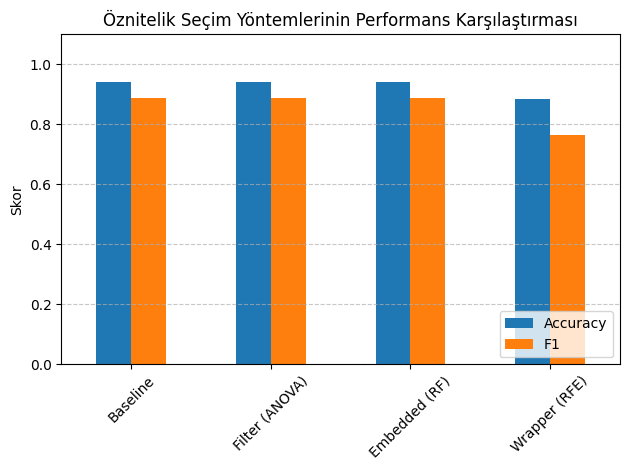

In [21]:
# Sonuçları DataFrame'e çevir
df_results = pd.DataFrame(results).T
print(df_results)

# Grafik Çizimi
plt.figure(figsize=(10, 6))
df_results[['Accuracy', 'F1']].plot(kind='bar', ylim=(0.0, 1.1))
plt.title('Öznitelik Seçim Yöntemlerinin Performans Karşılaştırması')
plt.ylabel('Skor')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()